# White Paper - A Case Study in Machine Learning in the Commercial Trucking Industry


# Background & Use Case


Developed, Programmed and Produced by: Dr. Michael Treasure - Data scientist providing services for Tiemac Technologies, Inc.(Tiemac) https://tiemaccorporation.com/. I should also mention here that this project was undertaken as a capstone project for IBM Advance Data Science Specialization certification.

Tiemac provides a Telematics and Fleet Management Solution for real time predictive analytics, data and business intelligence to measure, control and improve operational performance and profitability for carriers operating in the commercial over-the-road trucking sector. 

Tiemac sees an opportunity: ≈ 98% of all trucking companies (carriers) are made up of 50 or less trucks in their fleets. These small carriers lack size, scale, ability to combine efforts, capacity and resources and generally operate within the confines of large enterprises fleets. However, taken together, they are the largest enterprise in the industry. Tiemac Long Distance Load Interchange Marketplace (TLDLIM) is a markeplace solution for this enterprise group.

It should not be difficult then to see how very useful a Machine Learning solution would be to Tiemac in its TLDLIM. The image below shows a depiction of the how TLDLIM works. 
 - Essentially, two trucks, on either end of a freight route, are paired together, to exchange their freight (trailers) approximately midway on the route. 
 - The reliability of each truck (thus manufacturer/engine reliability) is extremely important, to ensure that paired trucks do meet up on schedule and are able to complete freight delivery accordingly.


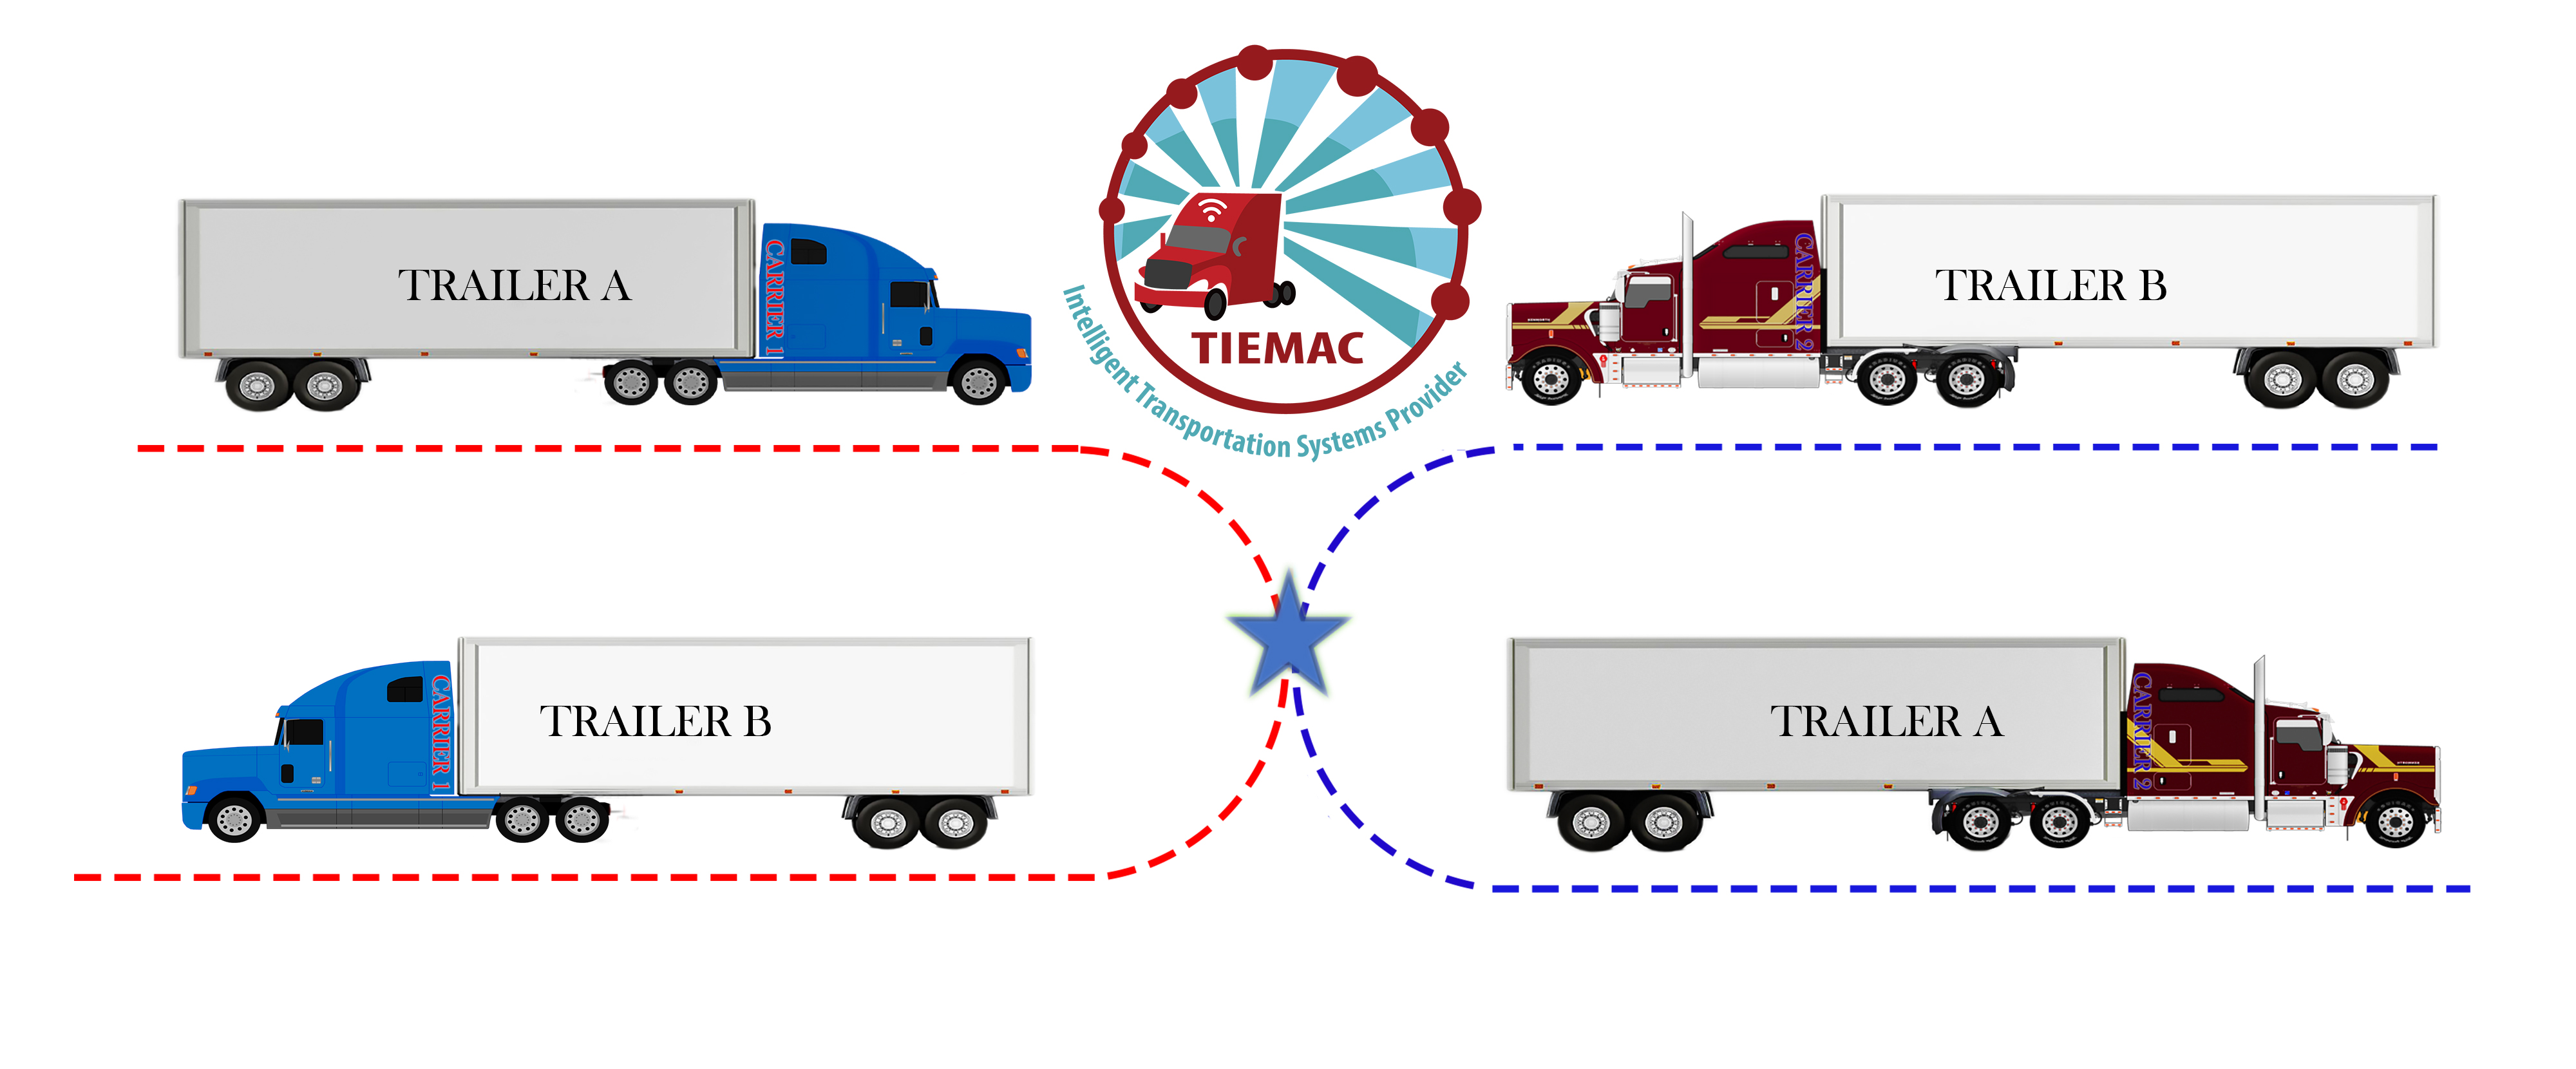

In [1]:
# import image module 
from IPython.display import Image
from IPython.core.display import HTML
PATH000 = 'E:\\MLCapstone\\engine_data\\'
Image(filename = PATH000 + 'TLDLIM_Depicted_Summary_RV3.jpg', width=1050, height=1050)

From a helicopter viewpoint, Tiemac is interested in using data from the electronic logging device (ELD) installed in trucks operating in its TLDLIM to analyze the performance of different types of truck manufacturer engines. The goal is to use the data to predict the performance of the manufacturers vehicles, evaluating the general reliability of trucks engines from these manufacturers. This could help to inform:

- Tiemac on the reliability of carrier's assets for a particular operating lane.
- The individual carriers themselves on which commercial truck manufacture generally have trucks with more operating reliability for their particular use cases.
- Inform the manufacturers on how well their trucks with specific engine mix are performing across the country under load.

To achieve its goal, Tiemac has asked me to build a predictive Machine Learning (ML) maintenance model. In lieu of real data taken from Tiemac's CrewAccount platform deployed in trucks across North America, I am going to use two other data sources for the datasets to be used in this project.

Automotive Vehicles Engine Health Dataset. This dataset is from Kaggle and will be used under license of CCO 1.0 Universal Public Dedication.
A random dataset will be created to represent 5 different vehicle manufacturers. Here the term vehicle manufacturers is to be interpreted as commercial vehicle engine manufacturers. Although there are specialist commercial vehicle engine manufactures, the 5 vehicle manufacturers mentioned here do produce/sell their own engines. The assumption therefore is that engines being analyzed here are the manufacturer's own engines.

In my analysis, the ML approach that will surface will be supervised machine learning with particular emphasis on regression.

# Introduction

It is instructive to provide context to this project. As outlined in the use case above, this project is aligned to the needs of Tiemac and is to be interpreted as a <strong> White Paper </strong>. 

The first diagram below shows a high level overview of the architectural structure that Tiemac employs. Therefore, for this project consideration is given for:
- Enterprise Data
- Technology Choices
- Streaming Analytics
- Data Integration
- Data Storage
- Analytics
- Security, Governance and System Management

I will not be going into descriptive details on this architecture, but rather I will rely on the diagram to at least provide the context from an architectural perspective.

Tiemac's technology stack was based largely (but not exclusively) on Microsoft technology stack and hence enterprise data was kept in such environment. Initially, Tiemac had relied heavily on Microsoft’s Azure platform for cloud computing, and used Microsoft systems, and development tools. However, in recent years Tiemac has been diversifying away from Microsoft and public cloud platforms in general. 

As a startup, and heavily in developmental phase, Tiemac discovered that computing cost on public cloud platforms can increase exponentially and really very quickly. Therefore, the company migrated back to more of a Hybrid approach, in which it has increasingly been using its own in house private cloud, where much of its compute is now being done, while it continues to use Microsoft's public cloud for back up and temporarily quick scaling, if and when needed.

In its own private cloud setup, for its big data and machine learning needs, Tiemac has shifted to using more open source platforms based on Apache Spark. Therefore, for this project the technology stack used includes the following:

- Python + pandas + scikit-learn
- Apache Spark (based on Hadoop)
- SparkML

This work was done on a spark cluster with all the prerequisites and configurations in place. Additionally, I used Anaconda with Jupyter Notebook. The primary software development tool was Python.

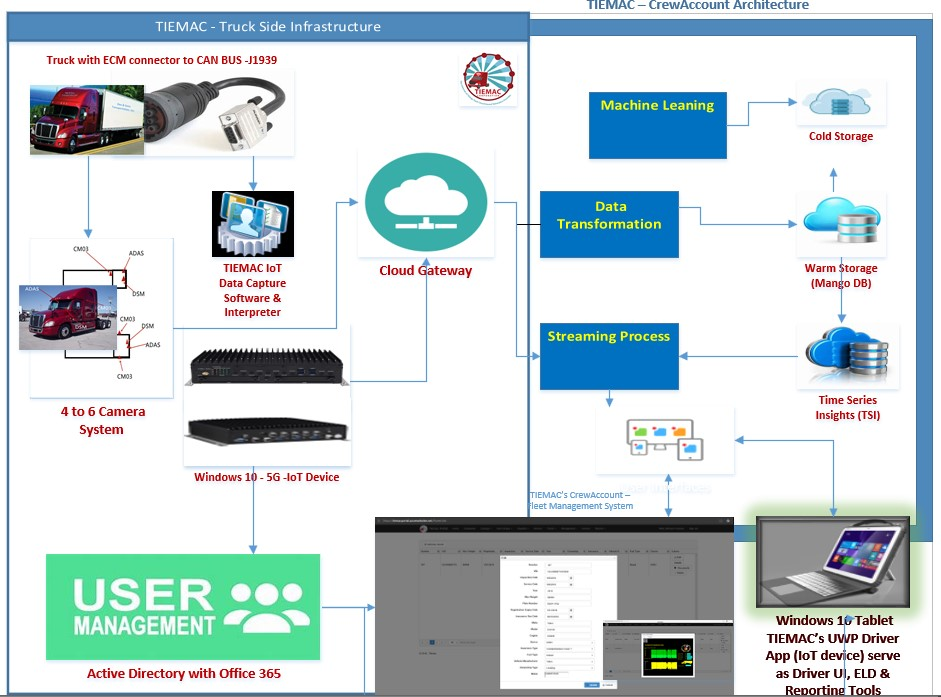

In [2]:
# import image module 
PATH0 = 'E:\\MLCapstone\\engine_data\\'
Image(filename = PATH0 + 'Tiemac_CrewAccount_Architecture.jpg', width=1050, height=1050)

Before building and training ML algorithms, it will be necessary to perform ETL jobs and build ML pipelines. Therefore, in this project, using the referenced datasets, I will preprocess the datasets. Such preprocessing will include, dropping any duplicate rows, and removing the rows with null/missing values, if necessary, scaling features to be within a certain range and encoding categorial variables such as the manufacturer of vehicles.

Once ETL is completed I will create different models, including regressions with ML pipelines to create a predictive maintenance model that could be ran against similar industry datasets to generate alerts and or recommendations for maintenance and repairs based on vehicle engine manufacturers. As part of this process, I will evaluate the model and persist the model.

# Process Model

For this project I will adopt, as a baseline guide, "The lightweight IBM Cloud Garage Method" for data science. This provides an iterative process model to map individual technology components much aligned to the architecture described above. Therefore, going forward, less emphasis will be placed on requirement engineering or design thinking tasks.

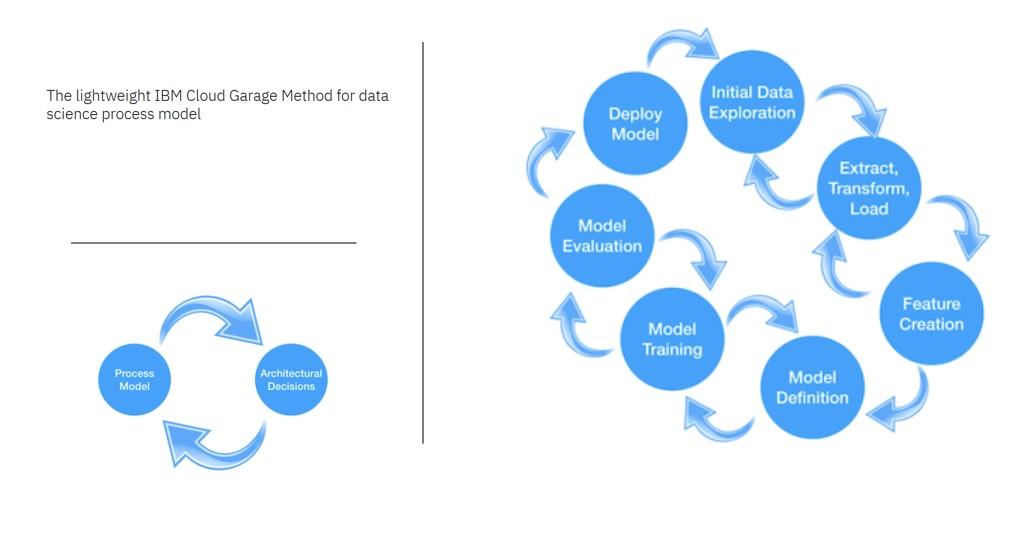

In [3]:
PATH01 = 'E:\\MLCapstone\\engine_data\\'
Image(filename = PATH01 + 'IBM_Light_Process_Model.jpg', width=750, height=750)

## Datasets

Having provided you with context above with respect to Tiemac's architecture and process model, for the purpose of this project we are not going to use actual data from Tiemac's CrewAccount platform. However, I am going to primarily use a data source that will provide a dataset akin to some of the datasets that would normally be collected through Tiemac's CrewAccount platform. In addition, I am going to create synthetic data to merge with the collected dataset.

The datasets:

 - Automotive Vehicle Engine Health Dataset - The original dataset may be found here: 
 https://www.kaggle.com/datasets/parvmodi/automotive-vehicles-engine-health-dataset​ 
 
 - Randomly created dataset of 5 commercial vehicle (engine) manufacturers that will be randomly matched to each row (record) of the Automotive Vehicle Engine Health Dataset.
 
 - To drive home the point of the relevancy of the adopted data set from Kaggle, below I will provide the text verbatum as currently found there:
 
 - <i> "One potential project using this dataset could be to build a predictive maintenance model for automotive engines. By analyzing the patterns and trends in the data, machine learning algorithms could be trained to predict when an engine is likely to require maintenance or repair. This could help vehicle owners and mechanics proactively address potential issues before they become more severe, leading to better vehicle performance and longer engine lifetimes.</i>
 
 - <i> "Another potential use for this dataset could be to analyze the performance of different types of engines and vehicles. Researchers could use the data to compare the performance of engines from different manufacturers, for example, or to evaluate the effectiveness of different maintenance strategies. This could help drive innovation and improvements in the automotive industry.</i>  


## Process Flow

In this project we will:

- Part 1 Perform ETL activity
  - Import initial set of required libraries
  - Create a Spark Session
  - Load a csv dataset and create PySpark dataframe
  - Print top 5 rows of dataframe
  - Count totoal rows and display schema
  - Remove duplicates if any
  - Drop rows with null values if any
  - Rename columns to remove spaces in variable names and make them lower case
  - Create a 2nd dataset with truck manufacturers
  - Create a dataframe from the truck manufacturer dataset and randomly populatte rows without null values
  - join the two dataframes to create a new dataframe
  - Check point evaluation
  - Store the merged and cleaned data in parquet file format
  
- Part 2 Retrieve saved dataframe
  - Load datasete from previously saved parquet file
  - Count number of rows
  - Show the first 20 records
  
- Part 3 Visualize Variables and Distributions
  - Install required packakges
  - Import required libraries
  - Convert PySpark dataframe to Pandas Dataframe
  - Shape Pandas Dataframe to count rows and columns
  - Create Series of Scatter Plots
  - Create Box Plot
  - Create Histogram Plots and Correlation Matrix
  
- Part 4 Build Logistic Regression Models 
  - Exploration with Manufacturers as target variable
  - Initial analysis on 1st of Logistic Regression exploration
  - Exploration with Engine Condition as target variable
      - Get Required Libraries
      - Plot Types & Count Engine Condition
      - Split Data Set into Training & Test sets
      - Build & Train Classifier
      - Calculate Metrics
      
- Part 5 Exame Evaluation Metrics 
  - Summarize
  - Analysis
  - Final Remarks on initial ETL Proces
  - Analyssis separate feature set from potential target

- Part 6 Create Baseline Machine Learning Pipeline Model 
  - Get and Transform the PysSpark Dataframe
  - Import required functions & define Vector Assemble
  - Instantiate Classifier from SparkML
  - Import additional required ML functions, Build, Train and Evaluate
      - Build Pipeline
      - Train Model
      - Predict
      - Evaluate

- Part 7 Create Desired ML Pipeline Model - Project Essence
  - Import required ML functions
      - Create String Indexer
      - One Hot Encode
  - Create Vector Assembler 
  - Build Classifier
  - Build Pipeline
  - Fit Model
  - Model Predict
  - Show Model
  - Evaluate Model
  - Interpret Model

- Part 8 Train the desired ML Model 
  - Split Data Set
  - Fit desired ML Model to Training Data Set
  - Predict desired ML Model with Training Data Set
  - Show the desired ML Model with Training Data Set 
  - Evaluate the desired trained ML Model on Trained Data Set


- Part 9 Predict and Evaluate the ML Model with Testing Data Set
  - Predict with ML Model on Testing Data Set
  - Calculate and Print MSE
  - Calculate and Print MAE
  - Calculate and Print R-Squared (R2)
  - Summarize ML Model with Testing Data Set


- Part 10 Persist the ML Model 
  - Save the desired ML model for future production use
  - Load the stored ML model
  - Make predicitions on Test Data
  - Show predictions

- Part 11 Data Normalization to improve ML Model 
  - Import Required Libraries
  - Take copy of merged baselie dataframe
  - Sperate Features
  - Use Vector Assember to assemble featuers for scaling
  - Scaled assembed features
  - Create new dataframe with scaled vectorized features
  - Print Schema

- Part 12 Use Normalized Data for New ML Model
  - Create String Indexer and then One Hot Encode
  - Create Vector Assembler
  - Build Classifier
  - Build Pipeline
  - Fit ML Model
  - ML Model Predict
  - Show ML Model
  - Evaluate ML Model
  - Interpret ML Model
  
- Part 13 Train Normalized Data ML Model 
  - Split Dataset
  - Fit ML Pipeline to Trained Data
  - Predict ML Model with Trained Data
  - Show Model with Trained Data
  - Evaluate Trained Data ML Model
  - Interpret Trained ML Model
  - Perform Feature Engineering

- Part 14 Draw Conclusion 
  - Requirement Statement + Datasets
  - Following the where the Datasets lead
  - Concluding Remarks





## Inititialization


### Installing Required Libraries

Spark Cluster environment with libraries like pyspark and findspark to connect to this cluster.


In [4]:
!pip install pyspark==3.5.0 -q
!pip install findspark -q

### Importing Required Libraries

_I would under normal approach recommend importing all required libraries in one place (here):_
_However, for the purpose of highlighting the use of specific packages and libraries, I will from time to time introduce them along the way:_

In [5]:
import findspark
findspark.init()

## Part 1 - Perform ETL activity


### Task 1 - Import required libraries


In [6]:
#your code goes here
from pyspark.sql import SparkSession
from pyspark.ml import Pipeline
from pyspark.ml.pipeline import PipelineModel
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.regression import LinearRegression
from pyspark.ml.feature import StringIndexer
from pyspark.ml.feature import StandardScaler

### Task 2 - Create a spark session


In [7]:
#Create a SparkSession
spark = SparkSession.builder.appName("Capstone Project").getOrCreate()

### Task 3 - Load the csv file into a dataframe


Download the data set from Kaggle.

NOTE : The data file downloaded from Kaggle was a zipped file. Therefore, it was downloaded to local environment, unzipped and then loaded from the local drive into spark cluster.


Load the dataset from the local drive into the spark dataframe


In [8]:
# Load the dataset that was downloaded in the previous task

df1 = spark.read.csv('///E:\\MLCapstone\\engine_data\\engine_data.csv', header=True, inferSchema=True)


### Task 4 - Print top 5 rows of the dataset


In [9]:
# code is here
df1.show(5)

+----------+----------------+-------------+----------------+------------+------------+----------------+
|Engine rpm|Lub oil pressure|Fuel pressure|Coolant pressure|lub oil temp|Coolant temp|Engine Condition|
+----------+----------------+-------------+----------------+------------+------------+----------------+
|       700|     2.493591821|  11.79092738|     3.178980794| 84.14416293|  81.6321865|               1|
|       876|     2.941605932|  16.19386556|     2.464503704| 77.64093415|  82.4457245|               0|
|       520|     2.961745579|  6.553146911|     1.064346764| 77.75226574| 79.64577667|               1|
|       473|     3.707834743|  19.51017166|     3.727455362| 74.12990715| 71.77462869|               1|
|       619|     5.672918584|  15.73887141|     2.052251454| 78.39698883| 87.00022538|               0|
+----------+----------------+-------------+----------------+------------+------------+----------------+
only showing top 5 rows



### Task 6 - Print the total number of rows in the dataset and print the schema


In [10]:
# code is here
rowcount1 = df1.count()
print(rowcount1)

19535


In [11]:
df1.printSchema()

root
 |-- Engine rpm: integer (nullable = true)
 |-- Lub oil pressure: double (nullable = true)
 |-- Fuel pressure: double (nullable = true)
 |-- Coolant pressure: double (nullable = true)
 |-- lub oil temp: double (nullable = true)
 |-- Coolant temp: double (nullable = true)
 |-- Engine Condition: integer (nullable = true)



### Task 7 - Drop all the duplicate rows from the dataset - if any


In [12]:
df1 = df1.dropDuplicates()


### Task 8 - Print the total number of rows in the dataset to check if any duplicate rows were present and henced dropped


In [13]:
#count the records again to see if duplicates were present and dropped

rowcount2 = df1.count()
print(rowcount2)


19535


### Task 9 - Drop all the rows that contain null values from the dataset - if any


In [14]:
df1=df1.dropna()


### Task 10 - Print the total number of rows in the dataset to see if any null value rows were present and dropped


In [15]:
#count the remaining rows

rowcount3 = df1.count()
print(rowcount3)


19535


From the above count checks we can see that the original dataset contained no duplicates and no null values.

### Task 11 - Rename the columns in the dataframe to remove spaces in the names and use all lower cases


In [16]:
from pyspark.sql.functions import col

new_columns = ['engine_rpm', 'lub_oil_pressure', 'fuel_pressure', 'coolant_pressure', 'lub_oil_temp', 'coolant_temp', 'engine_condition']

for i,n in zip(df1.columns,new_columns):
    df1 = df1.withColumnRenamed(i,n)


Print top 5 rows of the dataset

In [17]:
df1.show(5)

+----------+----------------+-------------+----------------+------------+------------+----------------+
|engine_rpm|lub_oil_pressure|fuel_pressure|coolant_pressure|lub_oil_temp|coolant_temp|engine_condition|
+----------+----------------+-------------+----------------+------------+------------+----------------+
|       501|      2.99477498|   4.47831813|     1.637320865| 76.78483587| 63.97067607|               0|
|       780|     2.594671525|   5.25603517|     2.114896407| 74.99287021| 75.52746711|               0|
|      1086|     2.625588801|  3.765344712|     1.811358686| 77.04368528| 82.62726219|               0|
|      1384|     0.259479674|  12.14284087|     3.785984041| 77.78951386| 86.34632501|               1|
|       782|     1.961151236|   8.56439345|     2.511618166| 76.43830417| 77.37116979|               0|
+----------+----------------+-------------+----------------+------------+------------+----------------+
only showing top 5 rows



### Task 12 - Create Second dataset

### The Automotive Vehicle Engine Health Dataset does not contain information on vehicle engine manufacturer. 
Therefore, I am going to create another dataset with vehicle engine manufacturer information

Step 1 - Define the number of rows as 19535, which is equal to the number of rows in dataframe df1 above and set columns = 1

Step 2  - Create a list of vehicle engine manufacturers names. I will randomly select 5 commercial truck engine manufacturers' names, as follows:
- Volvo
- Mack
- Freightliner
- International
- Kenworth

Step 3 - Use the random.choice function to randomly inject names from the manufacturers list into the rows

Step 4 - Create a new dataframe with a single column containing the random selected manufacturers names

In [18]:
import random
from pyspark.sql.functions import rand

# Define the number of rows and columns
rows = 19535
columns = 1

#Create the list of manufacturer's name
manufacturer = ['Volvo', 'Mack', 'Freightliner', 'International', 'Kenworth']

#Create a list of random manufacturers
random_manufacturer = [random.choice(manufacturer) for value in range(rows)]

# Create a new dataframe with a single column containing the random manufacturers
df2 = spark.createDataFrame([(value,) for value in random_manufacturer], ['manufacturers'])

#show the first 20 rows of this new dataframe
df2.show(20)

+-------------+
|manufacturers|
+-------------+
| Freightliner|
|     Kenworth|
|        Volvo|
|International|
|        Volvo|
|        Volvo|
|International|
|International|
|     Kenworth|
|         Mack|
|     Kenworth|
|International|
| Freightliner|
|         Mack|
|International|
|     Kenworth|
|     Kenworth|
|         Mack|
|     Kenworth|
|        Volvo|
+-------------+
only showing top 20 rows



### Task 13 - Print the total number of rows in this newly created dataset

In [19]:
#count the number of rows to check we have the same number of records as the in the previous dataframe

rowcount4 = df2.count()
print(rowcount4)

19535


### Task 14 - Create one new dataframe from the two dataframes above

Note - The method use below for joining the two dataframes is based on creating IDs. However, the IDs are based on the number of partitions. So if the two DataFrames have a different number of partitions, this won't be guaranteed to work to preserve the same number of records in the new merged dataframe. However, a work around that will be used is to set the number of partions for each dataframe to be the same and to be large enough to capture most if not all the records. Once we have sufficient records remaining we can proceed.

In [20]:
df1 = df1.repartition(36)
df2 = df2.repartition(36)

In [21]:
# In creating the new dataframe, I am going to use the monotically function to add and ID column to both dataframes and then use the ID column to join creating a new dataframe
from pyspark.sql import functions as F
from pyspark.sql.functions import monotonically_increasing_id
df1 = df1.withColumn("id", monotonically_increasing_id())
df2 = df2.withColumn("id", monotonically_increasing_id())

df3 = df1.join(df2, "id", "inner").drop("id")

In [22]:
#show the first 20 rows of this new dataframe to see if the join works as intended
df3.show(20)

+----------+----------------+-------------+----------------+------------+------------+----------------+-------------+
|engine_rpm|lub_oil_pressure|fuel_pressure|coolant_pressure|lub_oil_temp|coolant_temp|engine_condition|manufacturers|
+----------+----------------+-------------+----------------+------------+------------+----------------+-------------+
|       628|     1.998738288|  8.219071968|     1.457350001| 76.24542113| 92.02865188|               1|         Mack|
|       734|     4.148434572|   5.44578528|     1.430749525| 74.86696406| 84.89413913|               0|         Mack|
|       827|     4.313316622|  5.883723802|     3.266018879| 88.08943077| 75.50174012|               1|         Mack|
|       449|     2.541603901|  10.58610131|     3.576934088| 83.81795456| 79.16815651|               1|         Mack|
|      1096|     2.655848146|  4.646055253|     4.548715226| 75.92151314| 80.44826376|               1|        Volvo|
|       984|     2.492219616|  7.562085591|     2.026100

In [23]:
#count the number of rows to check if we have sufficient records to proceed. 

rowcount5 = df3.count()
print(rowcount5)

19515


### Task 15 - Check Point Evaluation



The code cell below is just to create a check point.<br>
It provides a summary of the data wrangling done.<br>
If the code throws up any errors, I will go back and review the code written.


In [24]:
print("Part 1 - Evaluation")

print("Total rows = ", rowcount1)
print("Total rows after dropping duplicate rows = ", rowcount2)
print("Total rows after dropping duplicate rows and rows with null values = ", rowcount3)
print("Total rows after creating dataframe randomly populated with manufacturers = ", rowcount4)
print("Total rows after merging dataframes = ", rowcount5)

import os

print("engine_man_data.parquet exists :", os.path.isdir("engine_man_data.parquet"))

Part 1 - Evaluation
Total rows =  19535
Total rows after dropping duplicate rows =  19535
Total rows after dropping duplicate rows and rows with null values =  19535
Total rows after creating dataframe randomly populated with manufacturers =  19535
Total rows after merging dataframes =  19515
engine_man_data.parquet exists : True


### Task 16 - Save the merged dataframe in parquet format, name the file as "engine_man_data.parquet"


I am saving the dataframe in parquet format to take advantage of the benefits the parquet file format offers such as efficient storage, faster query performance and schema preservation for evolution

In [25]:
df3.write.mode("overwrite").parquet("engine_man_data.parquet")


## Part - 2 Retrieve the saved Dataframe


### Task 1 - Load data from "engine_man_data.parquet" into a dataframe


In [26]:
#load the merged dataset

df4 = spark.read.parquet("engine_man_data.parquet")

### Task 2 - Print the total number of rows in the dataset


In [27]:
#show the total number of rows in the loaded dataset

rowcount6 = df4.count()
print(rowcount6)



19515


### Task 3 - Show the first 20 records in the dataset

In [28]:
#show top 20 rows
df4.show(20)

+----------+----------------+-------------+----------------+------------+------------+----------------+-------------+
|engine_rpm|lub_oil_pressure|fuel_pressure|coolant_pressure|lub_oil_temp|coolant_temp|engine_condition|manufacturers|
+----------+----------------+-------------+----------------+------------+------------+----------------+-------------+
|       811|     5.452593264|  5.079589925|     2.680202261| 76.54589478| 90.08560545|               0|         Mack|
|       558|     4.443161459|  5.610184593|     3.112912175| 76.66414132| 67.08213633|               1|         Mack|
|      1234|     2.981909274|  12.63864452|     2.102405305| 77.37659228| 74.82047801|               1|         Mack|
|       469|     4.328405379|  5.216832349|     6.625636587| 76.09339431| 78.95197818|               1|        Volvo|
|       770|     2.961174741|  2.240656493|      2.31300994| 74.53125761| 80.90553092|               0|        Volvo|
|       619|     3.934368926|  7.698462273|     2.278726

# Part 3 - Visualize relationships and variables distributions

To more easily visaulize through graphing we are going to go through some steps. My prefered analysis tool for this part of the project is Pandas. It is excellent for data representation on large datasets and does not require a lot of coding.
- Step 1 - install required packages
- Step 2 - import required libraries
- Step 3 - convert the PySpark dataframe to a Pandas Dataframe.
- Step 4 - create a series of scatter plots to look at possible correlation relationships

### Step 1 - install required packages

In [29]:
# install required package for visulization
!pip install pandas
!pip install scikit-learn
!pip install numpy
!pip install matplotlib

### Step 2 - import required libraries

In [30]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression

###  Step 3 - convert the PySpark dataframe to a Pandas Dataframe.

In [31]:
# Convert the PySpark DataFrame to a Pandas DataFrame
pdf1 = df4.toPandas()

In [32]:
# show 5 random rows from the pandas dataset
pdf1.sample(5)

engine_rpm  lub_oil_pressure  fuel_pressure  coolant_pressure  \
15420         632          3.778501       6.060802          1.391544   
253           702          3.558065       5.350089          1.259131   
962           758          2.260247       5.971341          1.060172   
19043        1409          5.232304       4.760199          2.569817   
2437          575          5.507878       7.952731          1.529160   

       lub_oil_temp  coolant_temp  engine_condition  manufacturers  
15420     87.176057     80.642357                 0  International  
253       75.999629     76.000506                 1  International  
962       79.593357     82.292334                 1       Kenworth  
19043     76.199437     79.341765                 1  International  
2437      76.126230     77.731028                 1  International

In [33]:
# Let's find out the number of rows and columns in the pandas dataset:
pdf1.shape

(19515, 8)

In [34]:
# Let's explore further in the pandas dataset:
pdf1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19515 entries, 0 to 19514
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   engine_rpm        19515 non-null  int32  
 1   lub_oil_pressure  19515 non-null  float64
 2   fuel_pressure     19515 non-null  float64
 3   coolant_pressure  19515 non-null  float64
 4   lub_oil_temp      19515 non-null  float64
 5   coolant_temp      19515 non-null  float64
 6   engine_condition  19515 non-null  int32  
 7   manufacturers     19515 non-null  object 
dtypes: float64(5), int32(2), object(1)
memory usage: 1.0+ MB


###  Step 4 - create a series of scatter plots to look at possible correlation relationships

In [35]:
# Let's create a scatter plot of lube oil pressure engine rpm . This will help us visualize the relationship between them.

<Axes: xlabel='lub_oil_pressure', ylabel='engine_rpm'>

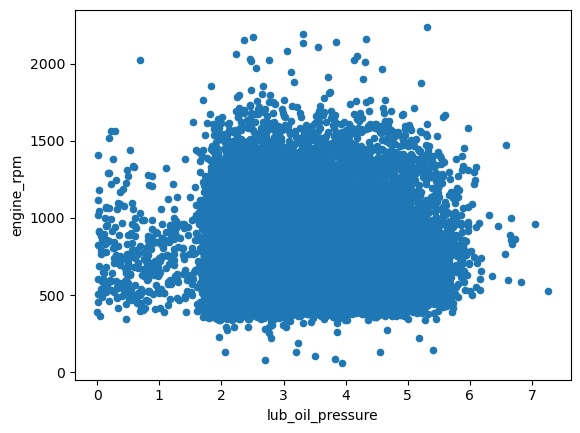

In [36]:
pdf1.plot.scatter(x = "lub_oil_pressure", y = "engine_rpm")

In [37]:
# Let's create a scatter plot of fuel pressure vs engine rpm . This will help us visualize the relationship between them.

<Axes: xlabel='fuel_pressure', ylabel='engine_rpm'>

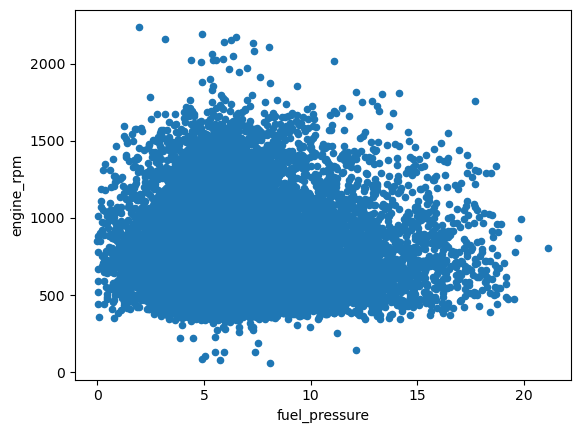

In [38]:
pdf1.plot.scatter(x = "fuel_pressure", y = "engine_rpm")

In [39]:
# Let's create a scatter plot of coolant pressure vs engine rpm . This will help us visualize the relationship between them.

<Axes: xlabel='coolant_pressure', ylabel='engine_rpm'>

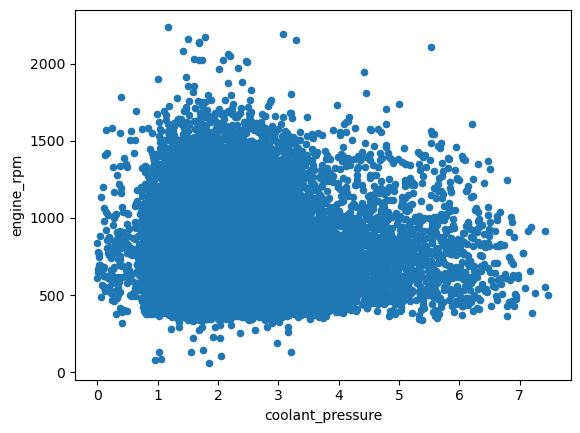

In [40]:
pdf1.plot.scatter(x = "coolant_pressure", y = "engine_rpm")

In [41]:
# Let's create a scatter plot of lube oil temperature vs engine rpm . This will help us visualize the relationship between them.

<Axes: xlabel='lub_oil_temp', ylabel='engine_rpm'>

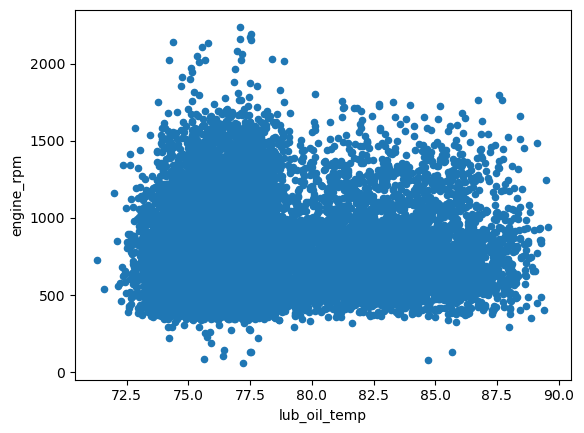

In [42]:
pdf1.plot.scatter(x = "lub_oil_temp", y = "engine_rpm")

In [43]:
# Let's create a scatter plot of coolant temperature vs engine rpm . This will help us visualize the relationship between them.

<Axes: xlabel='coolant_temp', ylabel='engine_rpm'>

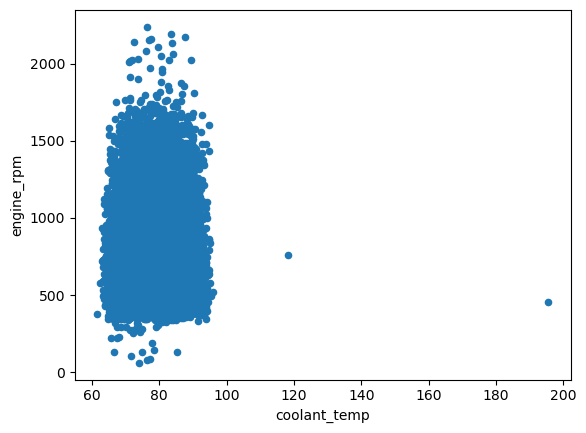

In [44]:
pdf1.plot.scatter(x = "coolant_temp", y = "engine_rpm")

### Step 5 - Create a Box Plot 

The scatterplot created above for coolant_temp vs engine_rpm reveals potential outliers. Therefore, we are going to look at a boxlot of each of those two variables for closer examination.

<Axes: >

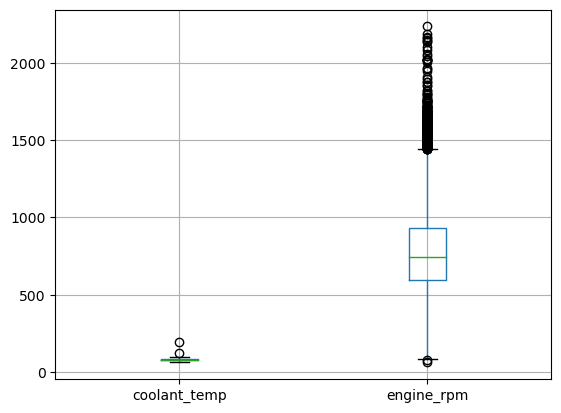

In [45]:
# create a box plot of coolant_temp and engine_rpm variables
pdf1.boxplot(column=['coolant_temp', 'engine_rpm'])

Given the different scales for the two variables we are going to create a separate boxplot for coolant temp so we may have a better view of the related data.

<Axes: >

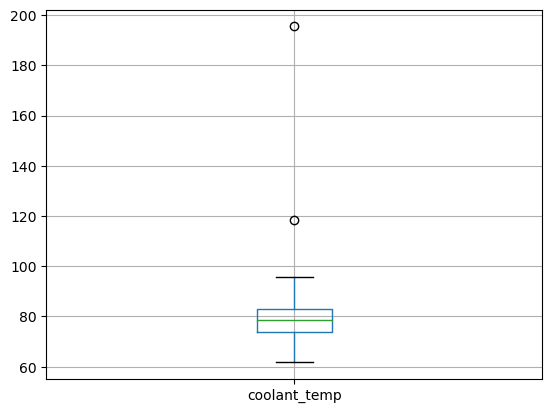

In [46]:
# create a box plot of the coolant_temp variable
pdf1.boxplot(column=['coolant_temp'])

Indeed the scatter plots do reveal deeper information on these two variables
- The coolant_temp variable shows outliers as well as a less than normal distribution. However, it appears there is relatively little skewness in data with the mean/centrality of the data being just under 80.
- The engine_rpm variable does show that a lot of the datapoints lie outside and mostly to the right (top) of the "wisker" and with a "long tail" - meaning right skewed, with the median(centrality) of the data being closer to the box lower values and the upper wisker is long.
- Further data wrangling and transformation may be needed in order to correct possible issues after consulting with subject matter domain experts on vehicle engine operations data range, etc.

### -  Step 6 - Create Histogram plots and Correlation Matrix of the variables

Let us look at the histogram of the first 6 columns of the pandas dataframe

array([[<Axes: title={'center': 'engine_rpm'}>,
        <Axes: title={'center': 'lub_oil_pressure'}>],
       [<Axes: title={'center': 'fuel_pressure'}>,
        <Axes: title={'center': 'coolant_pressure'}>],
       [<Axes: title={'center': 'lub_oil_temp'}>,
        <Axes: title={'center': 'coolant_temp'}>]], dtype=object)

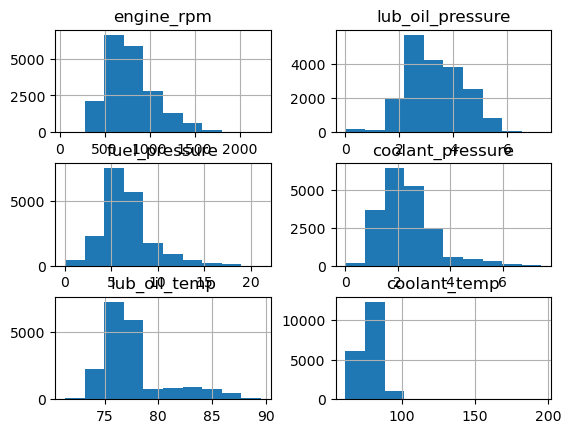

In [47]:
# lets plot the histograms
pdf1[['engine_rpm', 'lub_oil_pressure', 'fuel_pressure', 'coolant_pressure', 'lub_oil_temp', 'coolant_temp']].hist()

Lets look at the correlation matrix among the first 6 columns of the pandas dataframe

In [48]:
# select the first 6 columns to include in the correlation matrix
pdf1_subset1 = pdf1[['engine_rpm', 'lub_oil_pressure', 'fuel_pressure', 'coolant_pressure', 'lub_oil_temp', 'coolant_temp']]

# calculate the correlation matrix
corr_matrix = pdf1_subset1.corr()

print(corr_matrix)


                  engine_rpm  lub_oil_pressure  fuel_pressure  \
engine_rpm          1.000000          0.025254      -0.001564   
lub_oil_pressure    0.025254          1.000000       0.043127   
fuel_pressure      -0.001564          0.043127       1.000000   
coolant_pressure   -0.025053         -0.009591       0.033327   
lub_oil_temp        0.052303         -0.007958      -0.025037   
coolant_temp        0.029091         -0.060808      -0.042949   

                  coolant_pressure  lub_oil_temp  coolant_temp  
engine_rpm               -0.025053      0.052303      0.029091  
lub_oil_pressure         -0.009591     -0.007958     -0.060808  
fuel_pressure             0.033327     -0.025037     -0.042949  
coolant_pressure          1.000000     -0.020339      0.033413  
lub_oil_temp             -0.020339      1.000000      0.073396  
coolant_temp              0.033413      0.073396      1.000000  


Let's plot the manufacturers and count

In [49]:
from sklearn.linear_model import LogisticRegression

<Axes: >

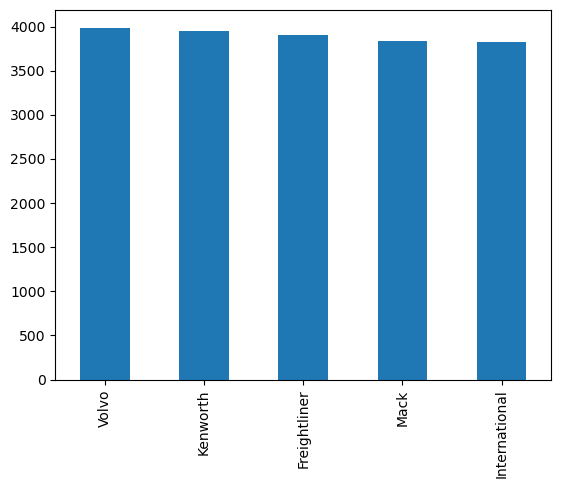

In [50]:
pdf1.manufacturers.value_counts().plot.bar()

## Part 4 - Building Logsitics Regression Models 

We can see that the 5 commercial truck vehicle engine manufactueres that we randomly distributed against the original Kaggle Automotive Vehicle Engine Health Dataset is relatively evenly distributed in terms of counts.


### Step 1 -  Logistics Regression Exploration with manufacturers as target

- We are going to explore the dataframe further to see if there is a logistics regression relationship that may possible be established with some relatively high degree of predictability between a feature set (lub_oil_pressure, fuel_pressure, coolant_pressure, lub_oil_temp and coolant_temp) and a target (manufacturers). 

- A question we may be interested in - Is there a possibility, for example, that through machine learning we may gain insights of whether a unique combination of values in the feature set signal a leaning towards one particular make of manufacturer truck engines over the others.

In [51]:
target = pdf1["manufacturers"]

In [52]:
features = pdf1[["lub_oil_pressure", "fuel_pressure", "coolant_pressure", "lub_oil_temp", "coolant_temp"]]

Build and train a classifier
- Step 1 - Create Logistic Regression Model
- Step 2 - Train/Fit the model

In [53]:
classifier = LogisticRegression()

In [54]:
classifier.fit(features,target)

LogisticRegression()

Evaluate the model

In [55]:
#Higher the score, better the model.
classifier.score(features,target)

0.20912118882910583

The above shows a relatively low score, which means it is not a very good model of vehicle prediction. 
Nevertheless, for completeness we will try and make a prediction based on the following values
 - lub_oil_pressure = 3.75689
 - fuel_pressure = 7.078912
 - coolant_pressure = 1.984560
 - lub_oil_temp = 78.348910
 - coolant_temp = 77.896715
 
 Before making the prediction lets get a summary statics for all numeric variables

In [56]:
pdf1.describe()

engine_rpm  lub_oil_pressure  fuel_pressure  coolant_pressure  \
count  19515.000000      19515.000000   19515.000000      19515.000000   
mean     791.139175          3.303988       6.656169          2.335031   
std      267.541144          1.021625       2.760988          1.035967   
min       61.000000          0.003384       0.003187          0.002483   
25%      593.000000          2.518866       4.917632          1.600334   
50%      746.000000          3.162117       6.202104          2.166883   
75%      934.000000          4.055081       7.745124          2.848597   
max     2239.000000          7.265566      21.138326          7.478505   

       lub_oil_temp  coolant_temp  engine_condition  
count  19515.000000  19515.000000      19515.000000  
mean      77.643254     78.426461          0.630387  
std        3.110442      6.207129          0.482712  
min       71.321974     61.673325          0.000000  
25%       75.725868     73.895421          0.000000  
50%       76.817401     78.345955          1.000000  
75%       78.072537     82.914990          1.000000  
max       89.580796    195.527912          1.000000

Let's use the information from the statistics table above to guide our choice of values to randomly chose to plug into our prediction model.

In [57]:
classifier.predict([[3.75689,7.078912,1.984560,78.348910,77.896715]])

E:\anaconda\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array(['Volvo'], dtype=object)

Based on our machine learning model and the classfier predictor values we supplied, the results show that the possible manufacture is a Volvo

We are going to do another logistics regression evaluation  - this time we are going to keep the "target" as manufacturer, but use feature set as only the "engine rpm"

In [58]:
target2 = pdf1["manufacturers"]

In [59]:
features2 = pdf1[["engine_rpm"]]

In [60]:
classifier2 = LogisticRegression()

In [61]:
classifier2.fit(features2,target2)

LogisticRegression()

In [62]:
#Higher the score, better the model.
classifier2.score(features2,target2)

0.20440686651293877

In [63]:
classifier2.predict([[2225]])

E:\anaconda\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array(['Volvo'], dtype=object)

Based on our machine learning model using RPM as the classfier predictor value we supplied, the result show that the possible manufacture is a Volvo engine make. Please note that this choice may change after each run (compilation) of the code, given the randomness employed for generating.

### Step 2 -  Initial analysis on these first sets of Logistics Regression Models

For both logistics regression models demonostrated above, the models were poor predictors. However, keep in mind the following:
- The Automotive Vehicles Engine Health Dataset is not related to real data ascertained from the specific named vehicle engine manufactures and the dataset is also not necessarily related to commercial vehicle engine use case under real world operations.
- The Engine Manufacturer dataset used was from data randomly created and populated to sync with each record in the Kaggle's Automotive Vehicles Engine Health Dataset.

Despite the poor predictor models, we should not be too disheartened as there are some important basis for the models. 
- In the USA, almost all commercial trucks hauling freight across State lines are required to and have ELDs installed. These ELDs, do provide real world operating data that can be ascertained for the variables used in the The Automatve Vehicles Engine Health Dataset for each of the 5 named vehicle engine manufacturers.
- With real ELD datasets, the model developed here may be very useful in helping the 98% of the commercial trucking companies (mentioned above) for new and replacement trucks to select the vehicle engine manufacturer that best meet their use cases.
- ELD providers could use the models to develop predictive maintenance plans derived from running against this data, generating alerts or recommendations for maintenance or repair for their clients.
- Even without real world ELD datasets, one may use these model for useful what if scenarios in machine learning training.

### Step 3 - Further analysis on new set of Logistics Regression with engine condition as target

- We are now going to explore further to see how good a logistics regression relationship is with some relatively high degree of predictability between the feature set (lub_oil_pressure, fuel_pressure, coolant_pressure, lub_oil_temp and coolant_temp) and our target (engine_condition). Is there a possibility, for example, that through machine learning we may gain insights of how well the feature set can be used to accurately predict engine conditition

#### Sub Step 1 - Get Required libraries 

In [64]:
#import functions for train test split

from sklearn.model_selection import train_test_split


# functions for metrics

from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

#### Sub Step 2 - Let's plot the types and count of engine_condition

In [65]:
pdf1.engine_condition.value_counts()

1    12302
0     7213
Name: engine_condition, dtype: int64

- The above shows binary encoding of the target variable
- Good Condition = 1
- Bad Condition = 0

<Axes: >

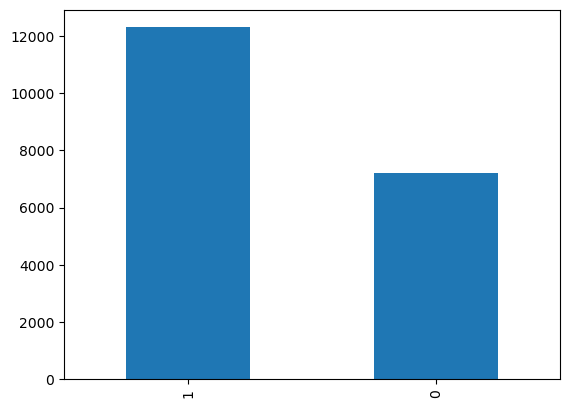

In [66]:
pdf1.engine_condition.value_counts().plot.bar()

There are more than 12,302 counts of engine condition being good (1) and more than 7,213 of engine condition being bad (0) in this dataset.

#### Sub Step 3 - Identify the target column and the data columns

First we identify the target. Target is the value that our machine learning model needs to classify

In [67]:
Y = pdf1["engine_condition"]

We identify the features next. Features are the input values our machine learning model learns from

In [68]:
X = pdf1[["lub_oil_pressure", "fuel_pressure", "coolant_pressure", "lub_oil_temp", "coolant_temp"]]

#### Sub Step 4 - Split the data set

We split the data set in the ratio of 70:30. 70% training data, 30% testing data.

In [69]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30, random_state=40)

#### Sub Step 5 - Build and train a classifier

Create a Logistic Regression model

In [70]:
classifier3 = LogisticRegression()

Train/Fit the model on training data

In [71]:
classifier3.fit(X_train,Y_train)

LogisticRegression()

#### Sub Step 6 -  Calculate approporiate metrices

In [72]:
#Higher the score, better the model.
xytest = classifier3.score(X_test,Y_test)

In [73]:
xytest

0.6423569598633646

To compute the detailed metrics we need two values, the original value and a predicted value.

In [74]:
original_values = Y_test
predicted_values = classifier3.predict(X_test)

##### Precision 

In [75]:
precisionscore = precision_score(original_values, predicted_values) # Higher the value the better the model

In [76]:
precisionscore

0.6492118137343722

#####  Recall

In [77]:
recallscore = recall_score(original_values, predicted_values) # Higher the value the better the model

In [78]:
recallscore

0.9577653033948142

##### F1 Score 

In [79]:
f1score = f1_score(original_values, predicted_values) # Higher the value the better the model

In [80]:
f1score

0.773866090712743

##### Confusion Matrix

In [81]:
confusematrix = confusion_matrix(original_values, predicted_values) # can be used to manually calculate various met

In [82]:
confusematrix

array([[ 178, 1936],
       [ 158, 3583]], dtype=int64)

## Part 5 - Examining Evaluation Metrics

### Step 1 - Summarize 

In [83]:
print("Evaluation - Important Metrices")

print("X_Test, Y_Test = ", xytest)
print("Precision Score = ", precisionscore)
print("Recall Score = ", recallscore)
print("F1 Score = ", f1score)
print("Confusion Matrix = ", confusematrix)

Evaluation - Important Metrices
X_Test, Y_Test =  0.6423569598633646
Precision Score =  0.6492118137343722
Recall Score =  0.9577653033948142
F1 Score =  0.773866090712743
Confusion Matrix =  [[ 178 1936]
 [ 158 3583]]


### Step 2 - Analysis 

The metrics as shown above are used as a score method in scikit-learn to evaluate the performance of our model on a test dataset with our target "engine_condition" being the focus of our classification by our feature set consisting of all other variables (except the "manufacturers"). 

- The quality of a machine learning model is often measured by its performance on a test dataset. In this project for our ML model, we first want to examine the qaulitity of the original dataset that we got from Kaggle, without the impact of our dataset of manufacturers, which we randomly created. 

- The score method returns the coefficient of determination (R-squared) value, which is a measure of how well the model fits the data. R-squared value ranges from 0 to 1, with higher values indicating better model performance. The X_Test, Y_Test value of 0.642357 we got above indicates that our model is performing not as good as we would want in a real world scenario, but fairly well for the purpose of this case study.

- The precision score is a metric to help us understand how well our model correctly predicts positive observations. Essentially, it takes the total number of correctly predicted positive observations and divides by the total number of predicted positive observations. The precision score of 0.649212 we got from our model tells us that from the data set 64.9212% of the time the model is accurately predicting the engine_condition based on our feature set. 

- The recall score metric measures how well the model correctly predicted all possible positive observations. Therefore, it takes the total number of correctly predicted positive data points and divides it by the total number of all data points that is positive, whether or not the model predicted it correctly. The recall score of 0.957765 we got from our model tells us that from the data set, 95.7765% of the time the model gets the positive prediction on the engine_condition correctly.

- The F1 score is a weighted average metric of the precision and recall metrices. It helps us understand how many times the model got it wrong, whether positively or negatively during its prediction. The lower this value is the higher the rate of false positives and false negatives. In our score above this number was 0.773866, which means 77.3866% of the time the model is NOT predicting false positives and false negatives.

 - The confusion metrics summarizes in a table foramt all the other other metrics. It is often used to measure the performance of classification models, which aim to predict a categorical label for each input instance. The matrix displays the number of true positives (TP), true negatives (TN), false positives (FP), and false negatives (FN) produced by the model on the test data. The embedded image below provides a good pictural view of the results of our model. Please note that the numbers in the image may NOT be the same numbers as in the table above. However, the numbers will be pretty close. The difference can be accounted for due to fact that each time the code is compiled and the randomness employed in the process, the numbers may come up slightly different. However, the result does not change the conclusion.

In [84]:
# import image module 
from IPython.display import Image
from IPython.core.display import HTML

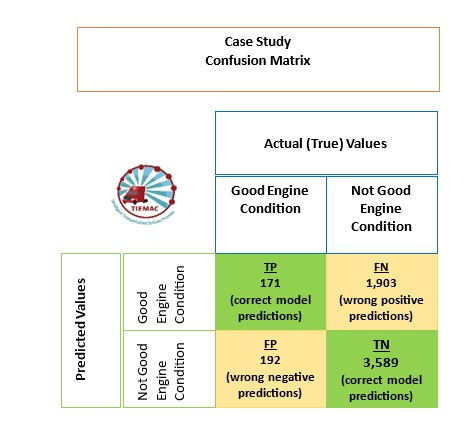

In [85]:
PATH = 'E:\\MLCapstone\\engine_data\\'
Image(filename = PATH + 'confusion_matrix.jpg', width=500, height=500)

### Step 3 - Analysis of Separate Engine Features and Engine Condition 

In [86]:
#Convert the PySpark DataFrame to a Pandas DataFrame
pdf2 = df4.toPandas()

Create a plot that provides visualization in one plot the distrubtion of all the attributes

In [87]:
import seaborn as sns
engine_features = pdf2.drop("engine_condition", axis=1)
engine_condition = pdf2["engine_condition"]

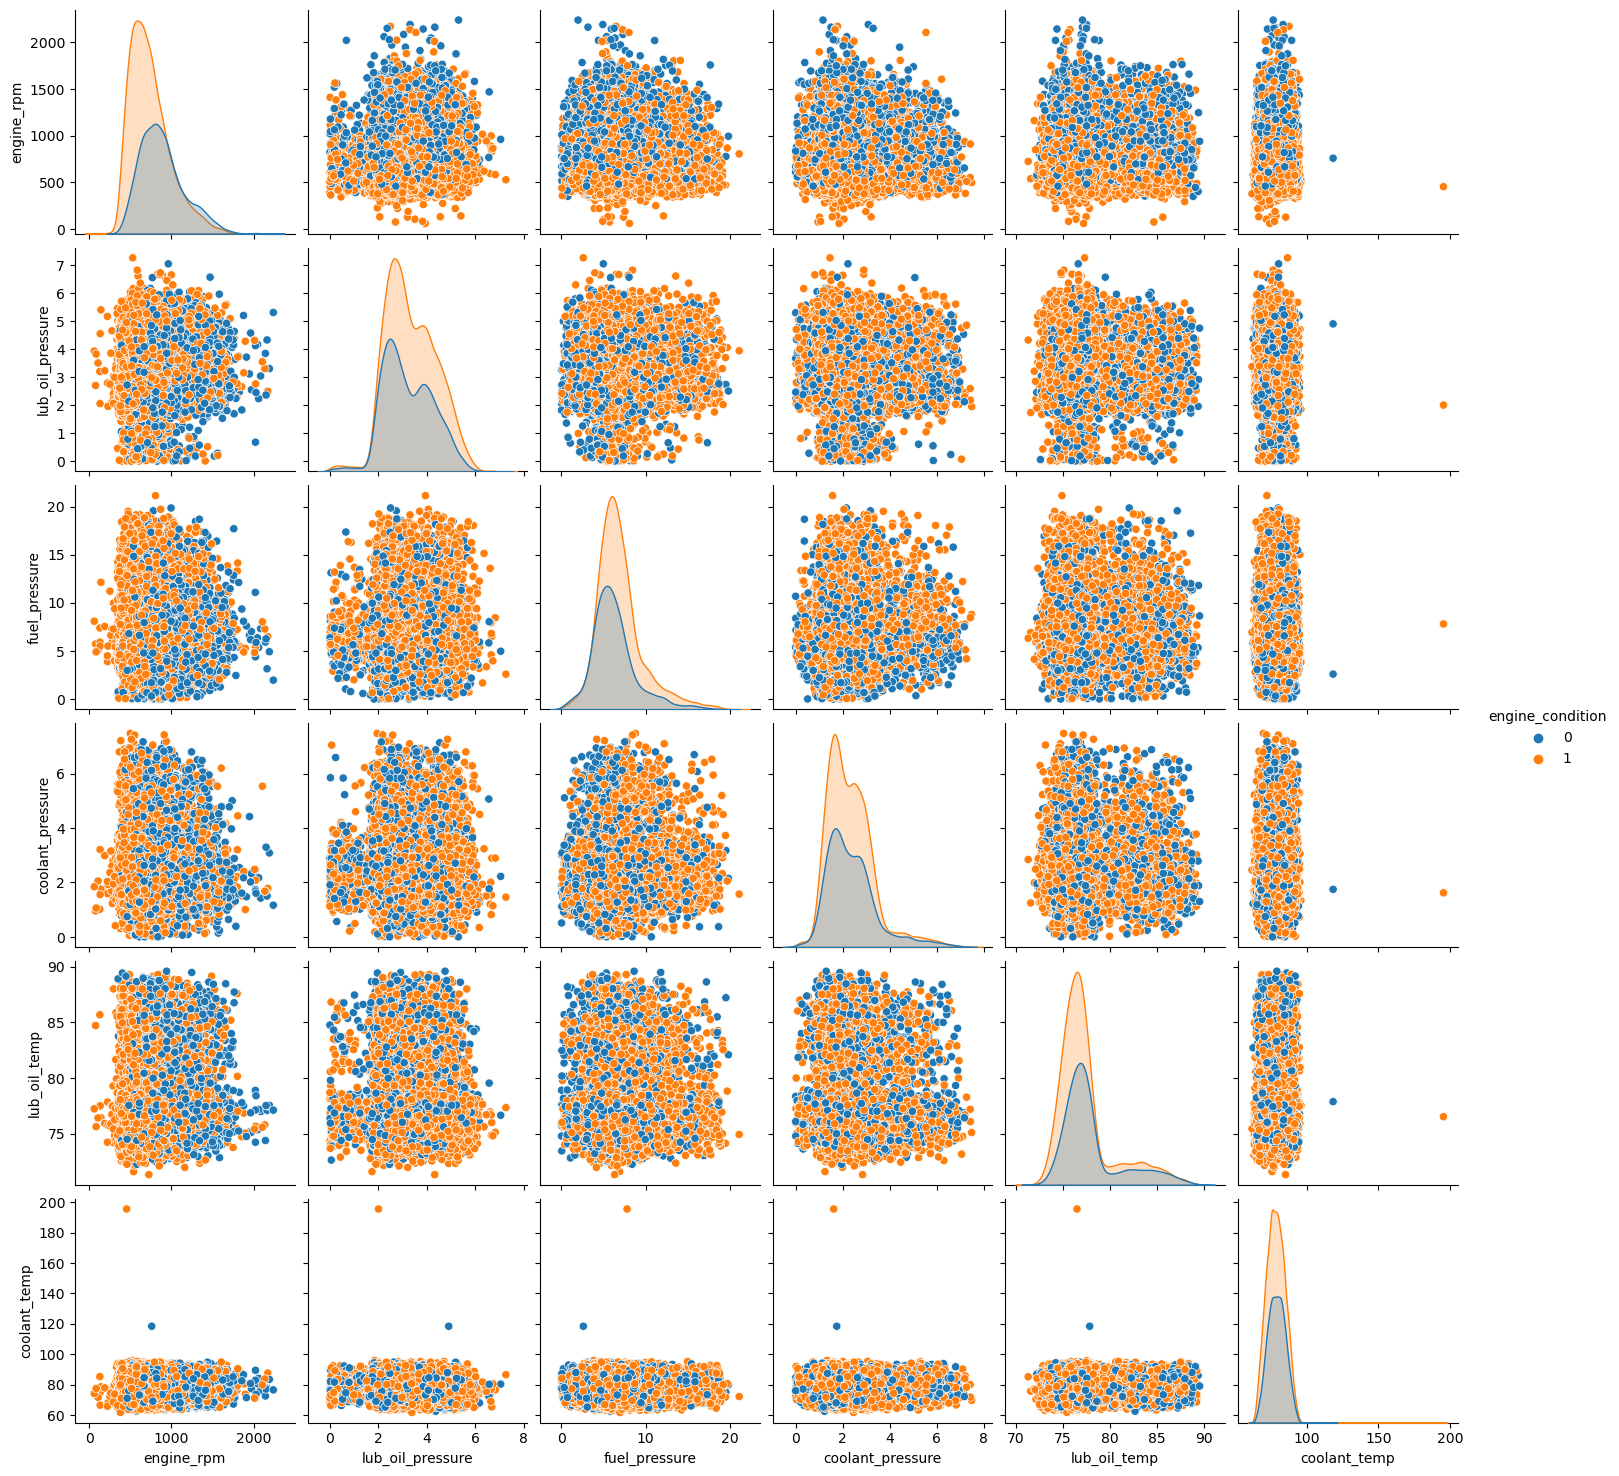

In [88]:
sns.pairplot(pdf2, hue="engine_condition")

Let's look at correlation coefficients of features (minus manaufacturers) relative to engine condition.

In [89]:
eng_corr_matrix = pdf2.corr()
eng_corr_matrix["engine_condition"].sort_values(ascending=False)

C:\Users\josep\AppData\Local\Temp\ipykernel_14288\1640321465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  eng_corr_matrix = pdf2.corr()


engine_condition    1.000000
fuel_pressure       0.116174
lub_oil_pressure    0.060766
coolant_pressure   -0.024159
coolant_temp       -0.046520
lub_oil_temp       -0.093797
engine_rpm         -0.268228
Name: engine_condition, dtype: float64

As was shown from earlier analysis of feature set (not including engine condition and manufacturers) there are some correlation between variables, but in the context of our use case, these are not material. With respective to the correlation matrices above a few inferences to be made are:
- Engine condition has the highest positive correlation with Fuel pressure = 11.62%.
- Engine condition has the higest negative correlation with Engine RPM = - 26.82%.
- The plot below provides some verification for the higher consistent values of fuel pressure and low values of engine rpm when the engine condition is positive.

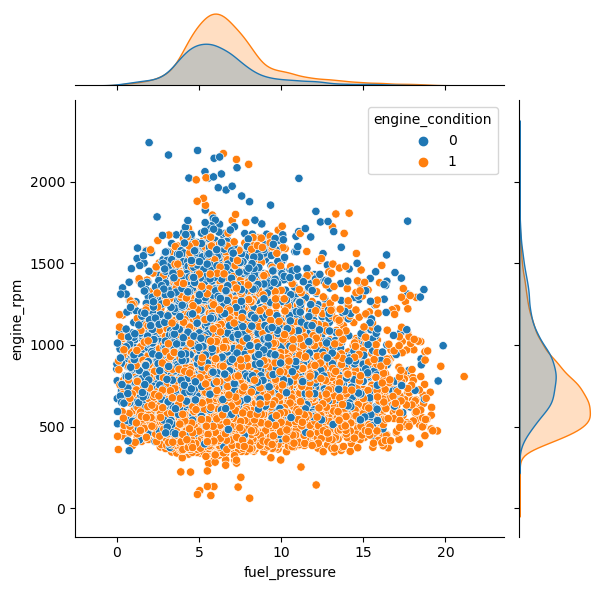

In [90]:
sns.jointplot(pdf2, x="fuel_pressure", y="engine_rpm", hue="engine_condition")

### Step 3 - Summary on Initial ETL Process with the use of Pandas

- The steps taken and tasks completed so far, including the creation of statistics and visualization on our Datasets were to help us identify what variables (columns) to use in our ML modeling for target and feature sets. Additionaly, it helped us to have identified potential data quality issues and the potential feature transformations necessary.

- Most of the features from the Kaggle dataset are well distributed. However, as identified earlier, for example, Coolant Temp has outliers, so do others, therefore the dataset may require scaling.

- The next sections of this project will switch focus to developing and interpreting a machine learning model built using PySpark and suitable for our use case and also based on the datasets we have examined above.

## Part 6 - Create a Machine Learning Baseline Pipeline 

- We are now going to swtich back from using Pandas to PySpark.
  - PySpark is a Python API use with Apache Spark
  - It is an analytical processing engine for large-scale distributed data processing and machine learning applications.
  - In real world scenarios, dealing with big data (volume, velocity, variety, veracity, valance & value), we need to handle distributed and parallel computing (perhaps 100s to 1Ms+ of computing nodes spread across geographic bounds) and in reference to our architecture, PySpark is one of the best tools to be used especially in ML applications.


### Task 1 - Get the PySpark Dataframe created earlier and drop a column not needed in this phase

In [91]:
# Drop column
df5 = df4.drop("manufacturers")

In [92]:
#show the top 5 records
df5.show(5)

+----------+----------------+-------------+----------------+------------+------------+----------------+
|engine_rpm|lub_oil_pressure|fuel_pressure|coolant_pressure|lub_oil_temp|coolant_temp|engine_condition|
+----------+----------------+-------------+----------------+------------+------------+----------------+
|       811|     5.452593264|  5.079589925|     2.680202261| 76.54589478| 90.08560545|               0|
|       558|     4.443161459|  5.610184593|     3.112912175| 76.66414132| 67.08213633|               1|
|      1234|     2.981909274|  12.63864452|     2.102405305| 77.37659228| 74.82047801|               1|
|       469|     4.328405379|  5.216832349|     6.625636587| 76.09339431| 78.95197818|               1|
|       770|     2.961174741|  2.240656493|      2.31300994| 74.53125761| 80.90553092|               0|
+----------+----------------+-------------+----------------+------------+------------+----------------+
only showing top 5 rows



Stage 1 - Assemble the input columns into a single column "features".


In [93]:
from pyspark.ml.feature import VectorAssembler

vectorAssembler = VectorAssembler(inputCols=['engine_rpm','lub_oil_pressure','fuel_pressure','coolant_pressure','lub_oil_temp', 'coolant_temp'], outputCol="features3")


###  Task 3 - Instantiate a classifier from SparkML package and assign it to the classifier variable

In [94]:
from pyspark.ml.classification import GBTClassifier

classifier = GBTClassifier(labelCol='engine_condition', featuresCol='features3', maxIter=10)

### Task 3 - Import the required ML function, build, train and evaluate


Stage 2 - build pipeline


In [95]:
from pyspark.ml import Pipeline
pipeline = Pipeline(stages=[vectorAssembler, classifier])


Stage 3 - train model - we are going to use the pyspark dataframe df4 that was created earlier.

In [96]:
model = pipeline.fit(df5)

Stage 4 - Predict and show model

In [97]:
prediction = model.transform(df5)

In [98]:
prediction.show()

+----------+----------------+-------------+----------------+------------+------------+----------------+--------------------+--------------------+--------------------+----------+
|engine_rpm|lub_oil_pressure|fuel_pressure|coolant_pressure|lub_oil_temp|coolant_temp|engine_condition|           features3|       rawPrediction|         probability|prediction|
+----------+----------------+-------------+----------------+------------+------------+----------------+--------------------+--------------------+--------------------+----------+
|       811|     5.452593264|  5.079589925|     2.680202261| 76.54589478| 90.08560545|               0|[811.0,5.45259326...|[-0.3327553246178...|[0.33950280922022...|       1.0|
|       558|     4.443161459|  5.610184593|     3.112912175| 76.66414132| 67.08213633|               1|[558.0,4.44316145...|[-0.5651584716892...|[0.24410261487033...|       1.0|
|      1234|     2.981909274|  12.63864452|     2.102405305| 77.37659228| 74.82047801|               1|[1234.0

Stage 5 - Evaluate Model

In [99]:
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
binEval = MulticlassClassificationEvaluator().setMetricName("accuracy") .setPredictionCol("prediction").setLabelCol("engine_condition")
    
binEval.evaluate(prediction) 

0.6781962592877274

- The evaluation results of 67.8196% from the model suggest the model is a not good for real world scenario. However, for this purpose, it is a farily good model to use to predict engine condition based on the set of variables features. It also reconciles well with the analysis we did earlier using Pandas.
- Now that we have built an acceptable ML model we can move to the essence of the Project.
- Imagine for a moment a carrier hauling time sensitive freight on a long haul from point A to point B. It would be very useful for the carrier to dispatch his most reliable truck on the route for that specific haul. Therefore, having timely information on manufacturer's engine performance and probability of manufacturer engine failure can be very instructive. The screenshot below is a capture of Tiemac's CrewAccount solution in action where this information was useful.

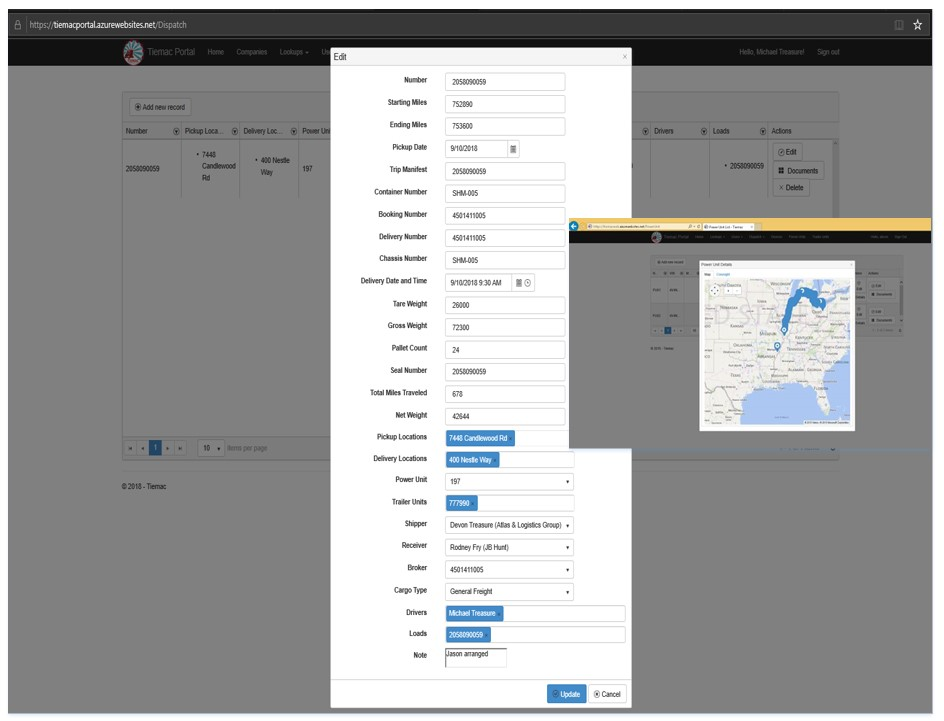

In [100]:
PATH021 = 'E:\\MLCapstone\\engine_data\\'
Image(filename = PATH021 + 'Tiemac_IoT_ML_Use_Case.jpg', width=1050, height=1050)

# Part 7 - Create The  Desired ML Pipeline - Now to the Essence of the Project!

One of the main objectives of the project is to develop a ML model that takes into consideration the feature set vehicle engine "manufacturers". However, to do this we will need to convert the categorial variable of "manufactuers" to an integer type. To do this we will use the One-Hot encode approach.

- First, we will use a StringIndexer to index the "manufacturers" categorical variables into numbers. This does not require a specific order. Essentially, we are mapping the strings values to numbers, and keep track of it as metadata attached to the DataFrame.

- Second, we will use One-Hot Encoding to map the categorical feature, now represented as a label index, to a binary vector, with at most a single 1-value, indicating the presence of a specific feature value from among the set of all feature values. This encoding will allow our use of a Regression ML.

### Step 1 - Import required ML functions, create a String Indexer and then One Hot Encode

In [101]:
from pyspark.ml.feature import OneHotEncoder, StringIndexer

# Using the df4 PySpark Dataframe, the colunm to encode is 'manufacturers'
stringInd = StringIndexer(inputCols=['manufacturers'], outputCols=['manufacturers_si'])
onehotencoded = OneHotEncoder(inputCols=['manufacturers_si'], outputCols=['manufacturers_ohe'])

### Step 2 - Create Vector Assembler

In [102]:
vectorAssembler2 = VectorAssembler(inputCols=['engine_rpm','lub_oil_pressure','fuel_pressure','coolant_pressure','lub_oil_temp', 'coolant_temp'] +['manufacturers_ohe'], outputCol="features4")

### Step 3 - Build Classifer

In [103]:
classifier3 = GBTClassifier(labelCol='engine_condition', featuresCol='features4', maxIter=10)

### Step 4 - Build the Pipeline

In [104]:
pipeline2 = Pipeline(stages=[stringInd, onehotencoded, vectorAssembler2, classifier3])

### Step 5 - Fit Model

In [105]:
model2 = pipeline2.fit(df4)

### Step 6 - Model predict

In [106]:
prediction2 = model2.transform(df4)

### Step 7 - Show Model

In [107]:
prediction2.show()

+----------+----------------+-------------+----------------+------------+------------+----------------+-------------+----------------+-----------------+--------------------+--------------------+--------------------+----------+
|engine_rpm|lub_oil_pressure|fuel_pressure|coolant_pressure|lub_oil_temp|coolant_temp|engine_condition|manufacturers|manufacturers_si|manufacturers_ohe|           features4|       rawPrediction|         probability|prediction|
+----------+----------------+-------------+----------------+------------+------------+----------------+-------------+----------------+-----------------+--------------------+--------------------+--------------------+----------+
|       811|     5.452593264|  5.079589925|     2.680202261| 76.54589478| 90.08560545|               0|         Mack|             3.0|    (4,[3],[1.0])|[811.0,5.45259326...|[-0.3245870616005...|[0.34317567090128...|       1.0|
|       558|     4.443161459|  5.610184593|     3.112912175| 76.66414132| 67.08213633|      

### Step 8 - Evaluate the Model

In [108]:
binEval2 = MulticlassClassificationEvaluator().setMetricName("accuracy") .setPredictionCol("prediction").setLabelCol("engine_condition")
    
binEval2.evaluate(prediction2) 

0.6775301050473994

### Step 9 - Interpretting the Model 

Upon adding the "manufacturers" variable by converting this categorial variable from string to Integer through One Hot Encoding into a new pipeline model, the evaluation result was improvded a little to 67.75301%. 


# Part 8 - Training the Model


### Task 1 - Split the data


In [109]:
# Split the data into training and testing sets with 70:30 split.
# set the value of seed to 42


(trainingData, testingData) = df4.randomSplit([0.7, 0.3], seed=42)



### Task 2 - Fit the pipeline to the training data


In [110]:
# Fit the pipeline using the training data

pipelineModel = pipeline2.fit(trainingData)


### Task 3 - Predict Model with Training data 

In [111]:
tdprediction1 = pipelineModel.transform(trainingData)

### Task 4 - Show the Model with the Training Data 

In [112]:
tdprediction1.show()

+----------+----------------+-------------+----------------+------------+------------+----------------+-------------+----------------+-----------------+--------------------+--------------------+--------------------+----------+
|engine_rpm|lub_oil_pressure|fuel_pressure|coolant_pressure|lub_oil_temp|coolant_temp|engine_condition|manufacturers|manufacturers_si|manufacturers_ohe|           features4|       rawPrediction|         probability|prediction|
+----------+----------------+-------------+----------------+------------+------------+----------------+-------------+----------------+-----------------+--------------------+--------------------+--------------------+----------+
|        77|     2.709672882|  5.724482212|     0.954160291| 84.70524234| 76.31983813|               1|     Kenworth|             0.0|    (4,[0],[1.0])|[77.0,2.709672882...|[-1.0437008459693...|[0.11032735377987...|       1.0|
|       132|     2.062610913|  5.912451937|     3.208835096| 77.52278057| 74.86194985|      

### Task 5 - Evaluate the Trained Model


In [113]:
binEval3 = MulticlassClassificationEvaluator().setMetricName("accuracy") .setPredictionCol("prediction").setLabelCol("engine_condition")
    
binEval3.evaluate(tdprediction1) 

0.6901623825821015

For the new pipeline model based off the training data, the evaluation results shows 69.0162%. 

# Part 9 - Predict with Testing Data and Evaluate the Model


### Task 1 - Predict with the model using Testing Data


In [114]:
# Make predictions on testing data

tndpredictions2 = pipelineModel.transform(testingData)


In [115]:
binEval4 = MulticlassClassificationEvaluator().setMetricName("accuracy") .setPredictionCol("prediction").setLabelCol("engine_condition")
    
binEval4.evaluate(tndpredictions2) 

0.662746454514009

- For the new pipeline model based off the testing data, the evaluation results shows 66.2746%.
- For our purpose, this is fairly good and suggest we are not overfitting and that the model is performing fairly well against the test data.

### Task 2 - Print the MSE


In [116]:
# code goes here

from pyspark.ml.evaluation import RegressionEvaluator

evaluator = RegressionEvaluator(predictionCol="prediction", labelCol="engine_condition", metricName="mse")
mse = evaluator.evaluate(tndpredictions2)
print(mse)


0.33725354548599096


### Task 3 - Print the MAE


In [117]:
# code goes here

evaluator2 = RegressionEvaluator(predictionCol="prediction", labelCol="engine_condition", metricName="mae")
mae = evaluator2.evaluate(tndpredictions2)
print(mae)


0.337253545485991


### Task 4 - Print the R-Squared(R2)


In [118]:
# code goes here

evaluator3 = RegressionEvaluator(predictionCol="prediction", labelCol="engine_condition", metricName="r2")
r2 = evaluator3.evaluate(tndpredictions2)
print(r2)


-0.45288512686022475


### Task 5 - Summarize ML Model with Testing Data



Run the code cell below.<br>
Collect the metrics values in one place here for easier review and analysis.<br>
If the code throws up any errors, I will go back and review the code.


In [119]:
print("Task 5 - Summary")

print("Mean Squared Error = ", round(mse,2))
print("Mean Absolute Error = ", round(mae,2))
print("R Squared = ", round(r2,2))


Task 5 - Summary
Mean Squared Error =  0.34
Mean Absolute Error =  0.34
R Squared =  -0.45


- From the above we see that both the Mean Squared Error (MSE) and the Mean Absolute Error (MAE) are equal. This tells us, that the model’s predictions are equally accurate and precise.

- The MSE provides measurement of the average squared difference between the predicted and actual values, while the MAE provides measurement of the average absolute difference between them.

- With both our errors equal, it suggests that our model’s predictions are not biased towards overestimation or underestimation of the actual values. It also further implies that the model’s predictions are not influenced by any significant outliers in the data, which if you recall was a concern, particularly with the outliers we had identified earlier with our data for the coolant temp variable.


# Part 10 - Persist the Model


### Task 1 - Save the model to the path "IBM_ML_Capstone_Final_Project"


In [120]:
# Save the pipeline model as "IBM_ML_Capstone_Final_Project"
pipelineModel.write().overwrite().save("IBM_ML_Capstone_Final_Project")


### Task 2 - Load the model from the path "IBM_ML_Capstone_Final_Project"


In [121]:
# Load the pipeline model you have created in the previous step
loadedPipelineModel = PipelineModel.load("IBM_ML_Capstone_Final_Project")


### Task 3 - Make predictions using the loaded model on the Test Data


In [122]:
# Use the loaded pipeline model and make predictions using testingData
predictions4 = loadedPipelineModel.transform(testingData)


### Task 4 - Show the predictions


In [123]:
#show top 100 rows from the predections dataframe. Display only the target column and predictions
predictions4_display = predictions4.select("engine_condition","prediction")


In [124]:
predictions4_display.show(100)

+----------------+----------+
|engine_condition|prediction|
+----------------+----------+
|               1|       1.0|
|               1|       1.0|
|               1|       1.0|
|               1|       1.0|
|               1|       1.0|
|               1|       1.0|
|               1|       1.0|
|               1|       1.0|
|               1|       1.0|
|               1|       1.0|
|               1|       1.0|
|               1|       1.0|
|               1|       1.0|
|               1|       1.0|
|               1|       0.0|
|               1|       1.0|
|               1|       1.0|
|               1|       1.0|
|               1|       1.0|
|               0|       1.0|
|               0|       1.0|
|               1|       1.0|
|               1|       1.0|
|               1|       1.0|
|               0|       1.0|
|               1|       1.0|
|               1|       1.0|
|               1|       1.0|
|               1|       1.0|
|               1|       1.0|
|         

## Part 11 - Can Data Normalization Improve the Model 

 - Now that we have created our ML Model and feel comfortable the model will provide a <u> relatively </u> good prediction outcome, as a a starting point. We now have to address the question of how we should improve the model. One technique we will consider here is data normalization. There are of course other techiques that may be considered.

 - In an earlier section during the data pre-processing and visulizatition process mentioned was made that some features showed outliers and that the engine RPM had significantly higher values than the other features. These would at least create a pause for further examination of the dataset as these observed nature of the dataset may have an impact on the developed ML model.
 
 - This section now turns to the issue of data normalization and we are going to normalize the dataset using PySpark ML StandardScaler library. This is a feature transformer that standardizes features by removing the mean and scalling to unit variance using column summary satistics.
 
 - We will take the following Steps in using StandardScaler

#### Step 1 - Import Required Libraries 

In [125]:
from pyspark.ml.feature import StandardScaler, VectorAssembler

#### Step 2 - Copy the Merged Based Line Dataframe

In [126]:
df6=df4

####  Step 3 - Separate Columns

In [127]:
# Select the columns to be scaled
cols_to_scale6 = ["engine_rpm", "lub_oil_pressure", "fuel_pressure", "coolant_pressure", "lub_oil_temp", "coolant_temp"]

In [128]:
# Select the colmns to keep
cols_to_keep6 = ["engine_condition", "manufacturers"]

#### Step 4 - Use Vector Assember to assemble columns to be scaled 

In [129]:
# Assemble the columns to be scaled into a vector
assembler6 = VectorAssembler(inputCols=cols_to_scale6, outputCol="features6")
df6_assembled = assembler6.transform(df6)

#### Step 5 - Scale Assembled columns 

In [130]:
# Scale the assembled features
scaler6 = StandardScaler(inputCol='features6', outputCol='scaled_features6')
scaler_model6 = scaler6.fit(df6_assembled)
df6_scaled = scaler_model6.transform(df6_assembled)

#### Step 6 - Create New Dataframe with Scaled Columns vectorized 

In [131]:
# Extract the scaled columns and the columns to keep
df6_result = df6_scaled.select(cols_to_keep6 + ['scaled_features6'])

#### Step 7 - Print Schema 

In [132]:
df6_result.printSchema()

root
 |-- engine_condition: integer (nullable = true)
 |-- manufacturers: string (nullable = true)
 |-- scaled_features6: vector (nullable = true)



## Part 12 - Use Normalized Data to develop new ML Model 

### Step 1 - Create String Indexer and then One Hot Encode 

In [133]:
# Using the df4 PySpark Dataframe, the colunm to encode is 'manufacturers'
stringInd6 = StringIndexer(inputCols=['manufacturers'], outputCols=['manufacturers_si6'])
onehotencoded6 = OneHotEncoder(inputCols=['manufacturers_si6'], outputCols=['manufacturers_ohe6'])

### Step 2 - Create Vector Assembler 

In [134]:
vectorAssembler6 = VectorAssembler(inputCols=['scaled_features6'] +['manufacturers_ohe6'], outputCol="features7")

### Step 3 - Build Classifer 

In [135]:
classifier6 = GBTClassifier(labelCol='engine_condition', featuresCol='features7', maxIter=10)

### Step 4 - Build the Pipeline

In [136]:
pipeline6 = Pipeline(stages=[assembler6, scaler6, stringInd6, onehotencoded6, vectorAssembler6, classifier6])

### Step 5 - Fit Model

In [137]:
model6 = pipeline6.fit(df6)

### Step 6 - Model Predict 

In [138]:
prediction6 = model6.transform(df6)

### Step 7 - Show Model 

In [139]:
prediction6.show()

+----------+----------------+-------------+----------------+------------+------------+----------------+-------------+--------------------+--------------------+-----------------+------------------+--------------------+--------------------+--------------------+----------+
|engine_rpm|lub_oil_pressure|fuel_pressure|coolant_pressure|lub_oil_temp|coolant_temp|engine_condition|manufacturers|           features6|    scaled_features6|manufacturers_si6|manufacturers_ohe6|           features7|       rawPrediction|         probability|prediction|
+----------+----------------+-------------+----------------+------------+------------+----------------+-------------+--------------------+--------------------+-----------------+------------------+--------------------+--------------------+--------------------+----------+
|       811|     5.452593264|  5.079589925|     2.680202261| 76.54589478| 90.08560545|               0|         Mack|[811.0,5.45259326...|[3.03130945990298...|              3.0|     (4,[3

### Step 8 - Evaluate the Model 

In [140]:
binEval6 = MulticlassClassificationEvaluator().setMetricName("accuracy") .setPredictionCol("prediction").setLabelCol("engine_condition")
    
binEval6.evaluate(prediction6) 

0.6775301050473994

### Step 9 - Interpret the Model 

Examination of the results of this normalized dataset relative to the unnormalized data set does not yield much, if any, model improvement to the ML Model.

## Part 13 - Training Normalized Data Model 

### Task 1 - Split the data 

In [141]:
# Split the data into training and testing sets with 70:30 split.
# set the value of seed to 42


(trainingData6, testingData6) = df6.randomSplit([0.7, 0.3], seed=42)

### Task 2 - Fit the pipeline to the training data 

In [142]:
# Fit the pipeline using the training data

pipelineModel6 = pipeline6.fit(trainingData6)

### Task 3 - Predict Model with Training Data

In [143]:
tdprediction6 = pipelineModel6.transform(trainingData6)

### Task 4 - Show the Model with Training Data 

In [144]:
tdprediction6.show()

+----------+----------------+-------------+----------------+------------+------------+----------------+-------------+--------------------+--------------------+-----------------+------------------+--------------------+--------------------+--------------------+----------+
|engine_rpm|lub_oil_pressure|fuel_pressure|coolant_pressure|lub_oil_temp|coolant_temp|engine_condition|manufacturers|           features6|    scaled_features6|manufacturers_si6|manufacturers_ohe6|           features7|       rawPrediction|         probability|prediction|
+----------+----------------+-------------+----------------+------------+------------+----------------+-------------+--------------------+--------------------+-----------------+------------------+--------------------+--------------------+--------------------+----------+
|        77|     2.709672882|  5.724482212|     0.954160291| 84.70524234| 76.31983813|               1|     Kenworth|[77.0,2.709672882...|[0.28755768695981...|              0.0|     (4,[0

### Task 5 - Evaluate the Trained Model

In [145]:
binEval7 = MulticlassClassificationEvaluator().setMetricName("accuracy") .setPredictionCol("prediction").setLabelCol("engine_condition")
    
binEval7.evaluate(tdprediction6) 

0.6901623825821015

### Step 6 - Interpret the Trained Model 

- Examination of the results of this normalized training dataset relative to the unnormalized training dataset does not yield much, if any, model improvement to the ML Model.
- With reference to "The Lightweight IBM Cloud Garage Method for data science" process model, we know this is an iterative proces. Of such, one may go back to ETL and preprocessing stage and perhaps do some "Feature Engineering" to aid in model improvement.

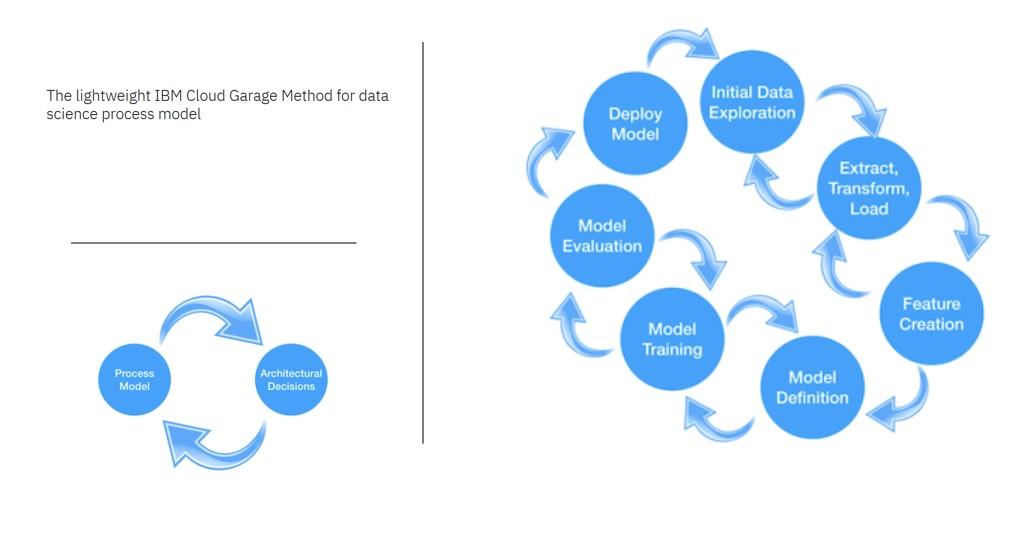

In [146]:
PATH011 = 'E:\\MLCapstone\\engine_data\\'
Image(filename = PATH011 + 'IBM_Light_Process_Model.jpg', width=750, height=750)

### Step 7 - Feature Engineering

Lets add two new columns to the dataframe showing coolant temperature and coolant pressure efficiencies.

In [147]:
from pyspark.sql.functions import col

df8 = df6.withColumn('coolant_tempefficiency', 1.0/col('engine_rpm') *col('coolant_temp'))
df8 = df8.withColumn('coolant_presefficiency', 1.0/col('engine_rpm') *col('coolant_pressure'))

df8.show(10)

+----------+----------------+-------------+----------------+------------+------------+----------------+-------------+----------------------+----------------------+
|engine_rpm|lub_oil_pressure|fuel_pressure|coolant_pressure|lub_oil_temp|coolant_temp|engine_condition|manufacturers|coolant_tempefficiency|coolant_presefficiency|
+----------+----------------+-------------+----------------+------------+------------+----------------+-------------+----------------------+----------------------+
|       811|     5.452593264|  5.079589925|     2.680202261| 76.54589478| 90.08560545|               0|         Mack|    0.1110796614673243|  0.003304811665844636|
|       558|     4.443161459|  5.610184593|     3.112912175| 76.66414132| 67.08213633|               1|         Mack|   0.12021888231182795|  0.005578695654121863|
|      1234|     2.981909274|  12.63864452|     2.102405305| 77.37659228| 74.82047801|               1|         Mack|  0.060632478128038896|  0.001703732013776337|
|       469|    

- After feature engineering is completed one may update the feature set in the ML model and rerun to look at model improvements. As data continue to come in from the "real world" from the CrewAccount system as depicted below, continous improvement can be made to the model from this feedback loop.
- The screenshot below shows how Tiemac would take the feedback loop and update the ML model to provide real time improvements to operations in its TLDLIM

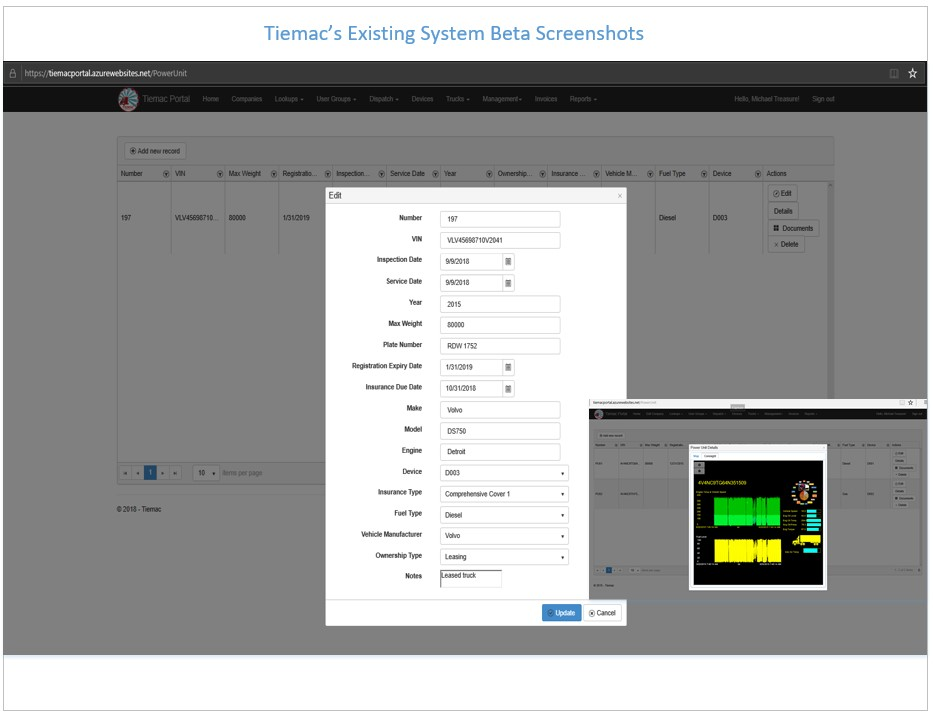

In [148]:
PATH3 = 'E:\\MLCapstone\\engine_data\\'
Image(filename = PATH3 + 'Tiemac_IoT_ML_Integration.jpg', width=1050, height=1050)

# Part 15 - Conclusion


### Step 1 - Requirement Statement with Datasets

 - The ETL and data exploration process coupled with the problem statement, led to the choice of a logistics regression ML model development.
 - Logistics regression is a popular supervised machine learning algorithm used for classification tasks, where the goal is to predict the probability that an instance belongs to a given class or not. It is a statistical algorithm that analyzes the relationship between a set of independent variables and the dependent binary variables 1 or 0. 
 - In this use case it is a powerful tool for decision-making, to predict whether engine condition is good - represented as 1 or bad - represented as 0 for values of the chosen set of independent variables.
 - Logistics regression is used when the data is linearly separable and the outcome is binary in nature. It tries to split input data into two classes and gives the probability that the data is in one of the two classes. 
 - A logistics function is used to map predicted values to probabilities. It maps any real value into another value within a range of 0 and 1. Therefore I developed a ML model to predict machine condition for either good (1) or bad (0). The following steps were involved in building the ML logistics regression model:
    - Data Collection: Collected data from Kaggle and also synthetically created data.
    - Data Preprocessing: Cleaned and preprocessed data.
    - Data Exploration: Explored data using various visualization techniques.
    - Feature Engineering: Selected relevant features for building the model.
    - Model Building: Trained the ML logistics regression model on the selected independent variables and estimates of the coefficients of the model.
    - Model Evaluation: Evaluated, against test data, the performance of the logistics regression model using appropriate metrics such as R-Squred, accuracy, precision, recall and F1-score.

### Step 2 - Following the dataset lead to address the Requirement Statement 

 - I started out with a dataset pulled from Kaggle. This dataset, upon examination of the schema, was largely integer and double data types. However, one variable was of a binary character, having value of 1 or 0.
 - I then created a second dataset of string type having multiple classes. Finally, I merged the two datasets creating one data set with multiple data types.
 - Before making a determination on what ML alogithm was to be adopted, I performed an ETL process, including data exploration for possible variable relationships and or data inconsistencies between and among our datasets. 
 - After an intitial ETL and data exploration process was completed, the proces informed me as to the direction that I should take to address the problem I set out to find for a ML model that could be applied.
 - With the problem statement clearly in mind - The goal was to use the datasets to compare the performance of vehicle engine manufacturers by evaluating the general reliability of trucks engines from these manufacturers through a binary lens. The binary lens was to predict a value of 1 - good manufacture vehicle engine performance, or 0 - bad manufacturer vehicle engine performance, given values of the featureset of variables predictors.

### Step 3 - Concluding Remarks

- With results showing greater than 65% probability success, the Machine Learning Model developed proved to be a <u> relatively </u> good one, as a starting point and given the datasets that were used. Of course in a real world scenario one wants to be above 80% with accuracy. However, for the purpose of this case study project we will be satisifed with 65% as an acceptable starting point.

- The evaluation metrics derived from the trained model supports the premise that the model is relatively good model to use to predict engine condition based on the set of variables features.

- Tiemac provides a Telematics and Fleet Management Solution for real time predictive analytics, data and business intelligence to measure, control and improve operational performance and profitability for carriers operating in the commercial over-the-road trucking sector. This project demonstrated that the value proposition that Tiemac has can be a very transformative one in incorporating this ML model into its TLDLIM.

- Therefore, this project demonstrates, the trained ML model developed for this project, could be integrated into a larger system for monitoring the health of automotive engines. One of Tiemac's goals is to use its CrewAccount ELD module to collect CAN-BUS J1939 data from sensors in commercial vehicles to collect real-time data on engine performance, which is then sent to its central server for analysis and use in its Tiemac Long Distance Load Interchange Marketplace (TLDLIM). 

- A predictive maintenance model, modeled off the approach use here with this dataset, would then generate, among many other things, alerts or recommendations for maintenance or repair based on manufactures of vehicle engines of commercial trucks deployed in the use case identified for this project. 



- Further ML modeling could be done. 

    - using real time streaming data from the CrewAccount ELD module, we could use SystemML in PySpark to examine Time Series data streaming in from the ELD sensor feed.
    - we could look at individual variables of our feature set (engine_rpm, lub_oil_pressure, fuel_pressure, coolant_pressure, lub_oil_temp) with engine condition and engine manufacturer as predictable targets.
    - Other ML and deep learning techniques could be explored



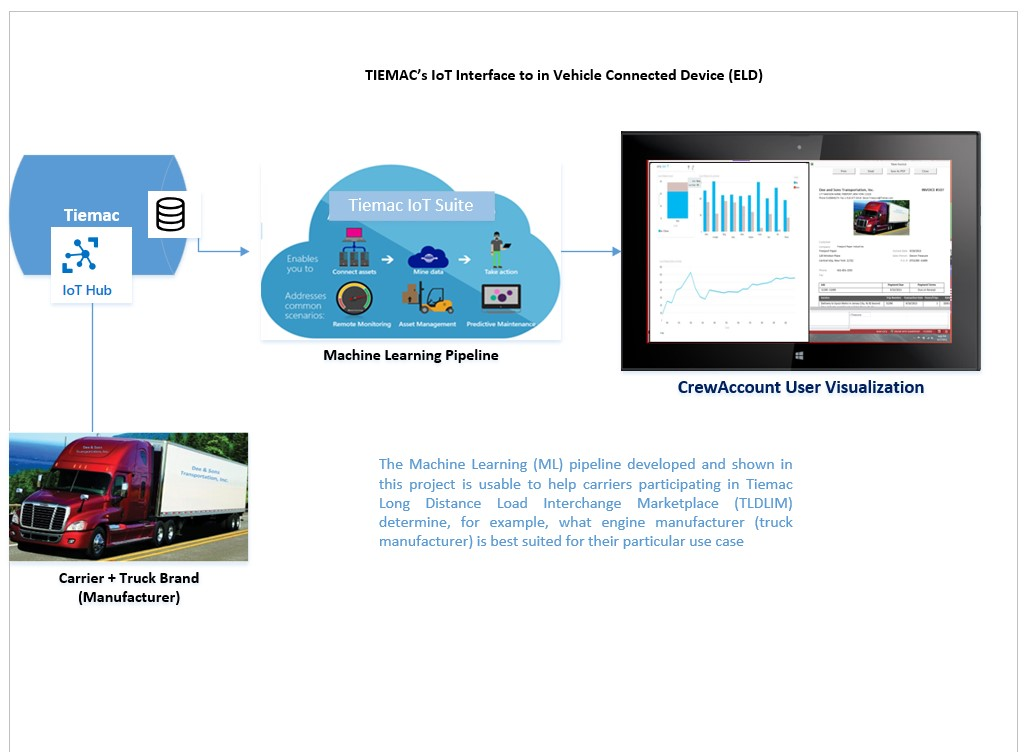

In [149]:
PATH4 = 'E:\\MLCapstone\\engine_data\\'
Image(filename = PATH4 + 'Tiemac_IoT_ML.jpg', width=1050, height=1050)

## Authors


[Dr. Michael Treasure](https://www.linkedin.com/in/michaeltreasure0001/)


## Change Log


|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|
|2023-10-27|1.0|Dr. Michael Treasure|Initial Version Completed|


Copyright © 2023 Tiemac Technologies, Inc. All rights reserved.


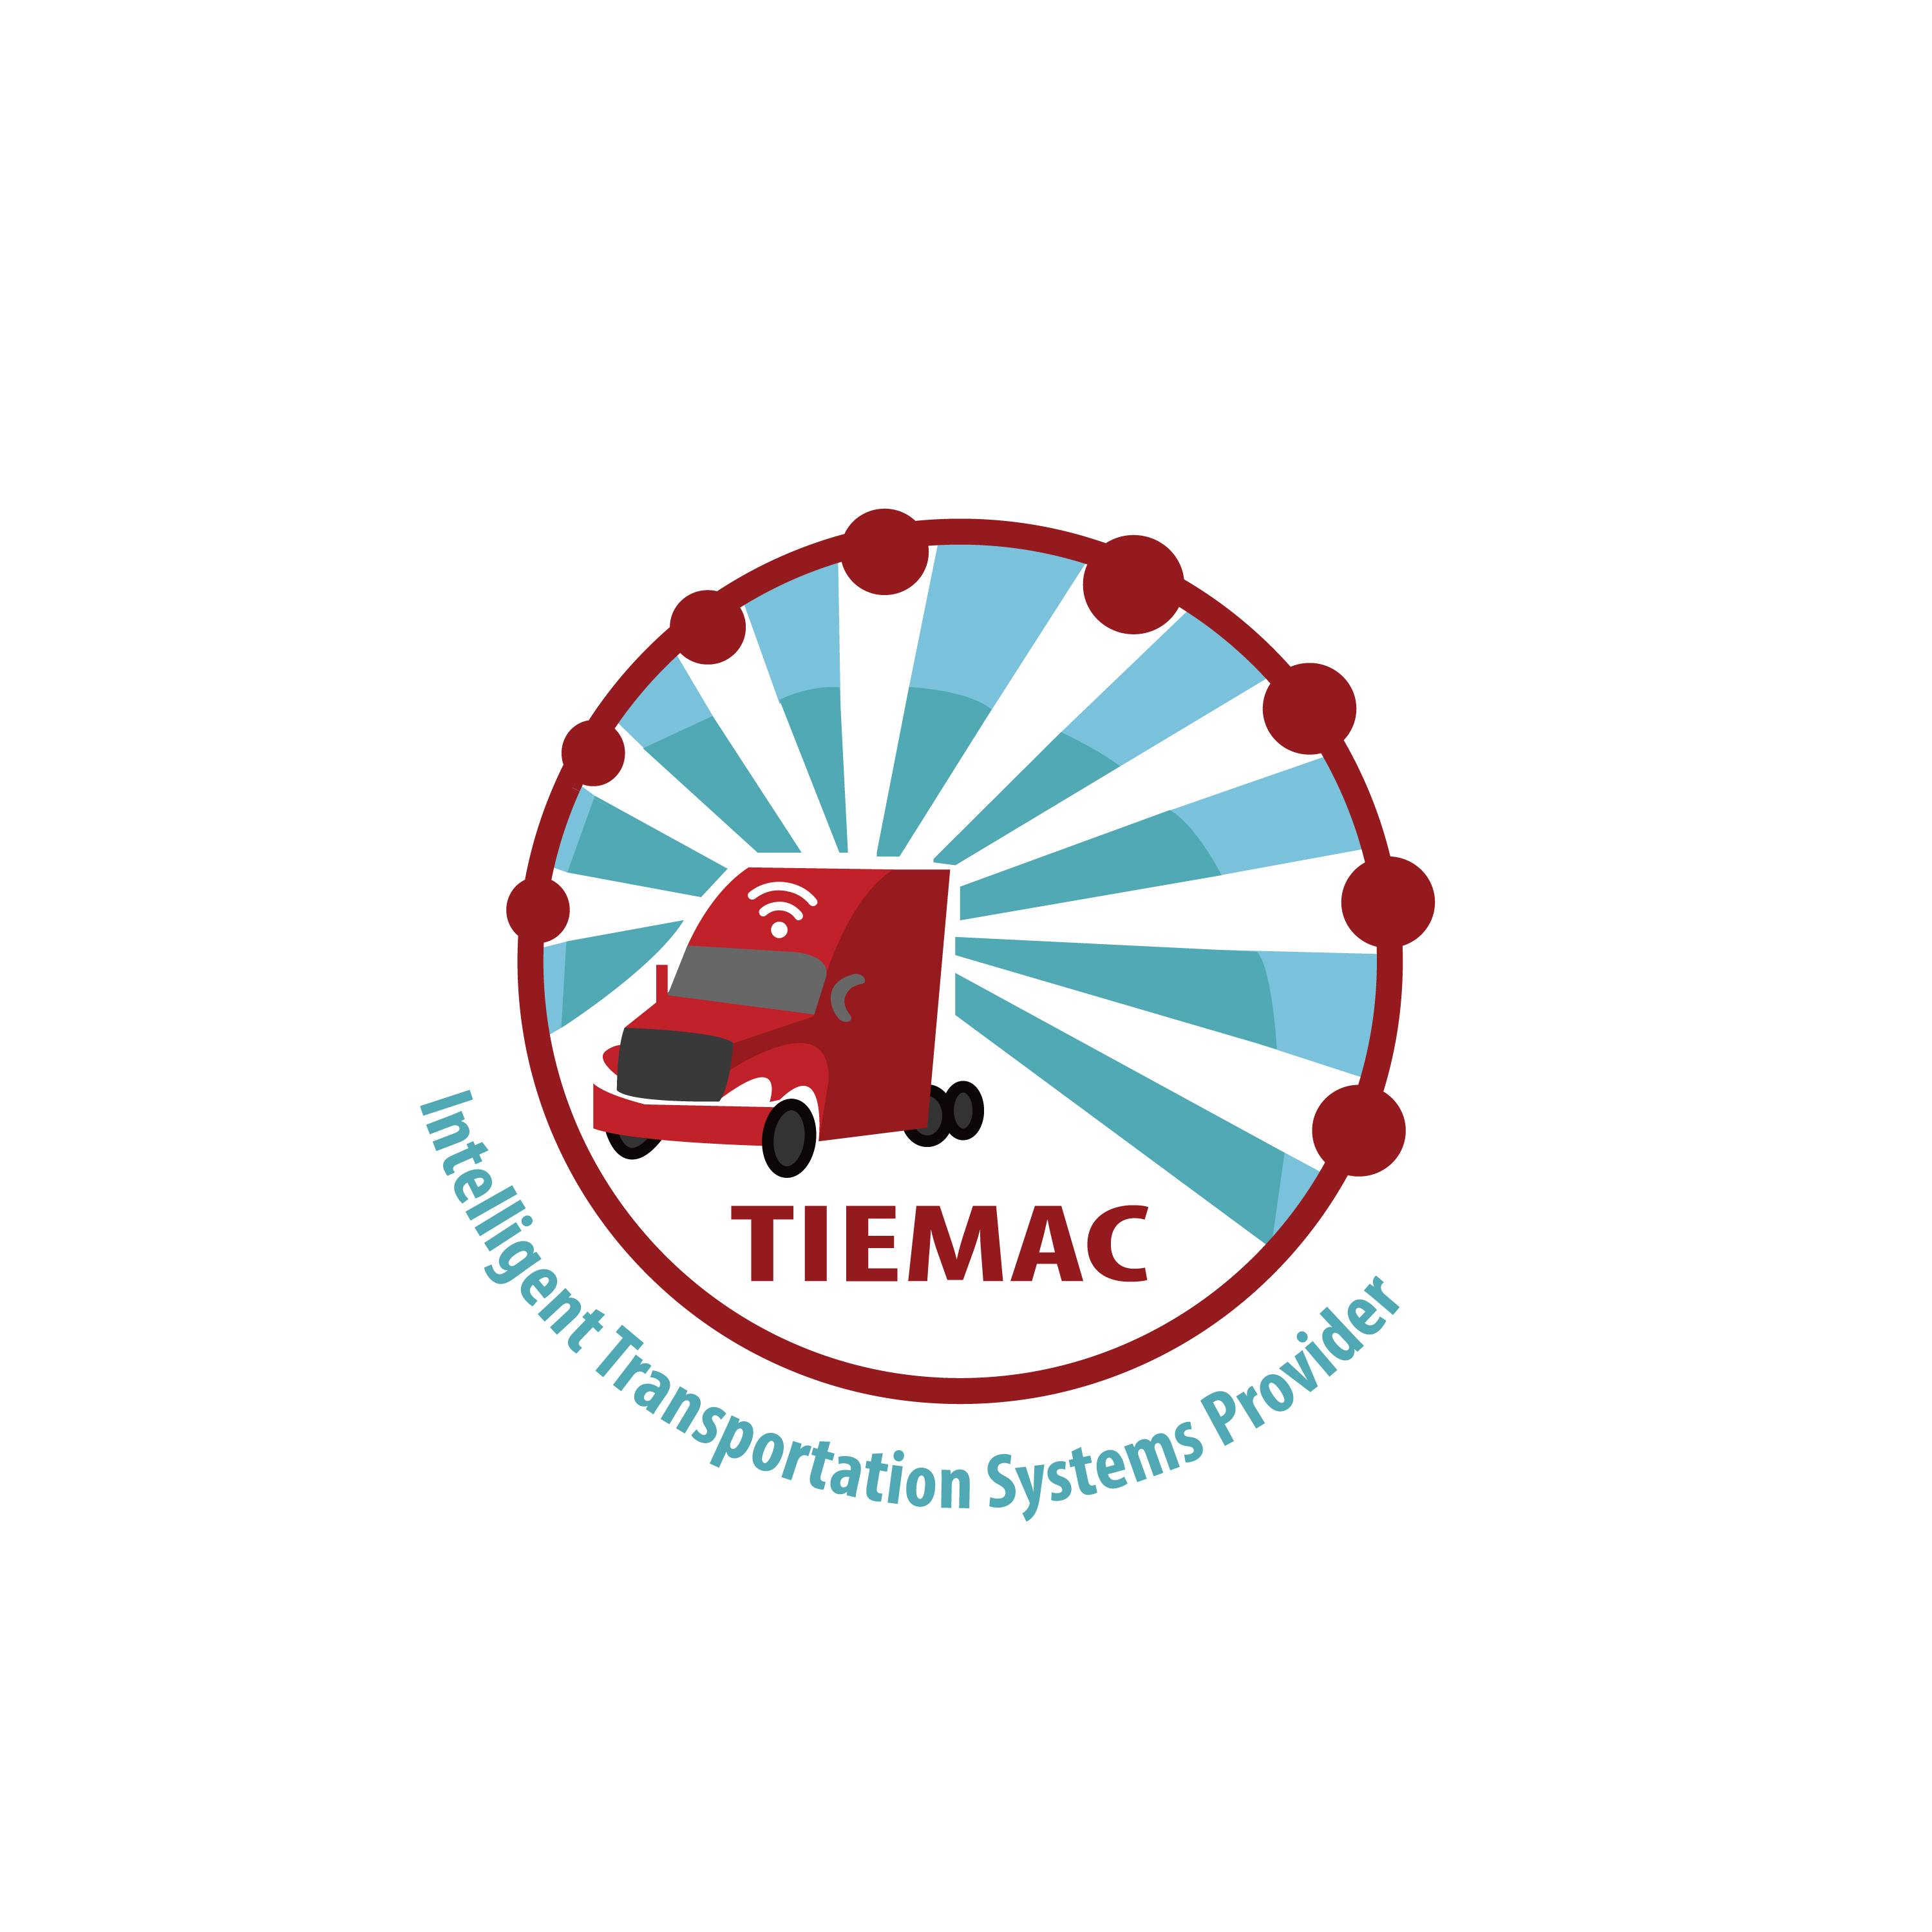

In [150]:
PATH2 = 'E:\\MLCapstone\\engine_data\\'
Image(filename = PATH2 + 'Tiemac_logo.jpg', width=100, height=100)